In [1]:
#Imports 
import ast
import re
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

train = pd.read_csv('final_train_contain_train_test.csv')
test = pd.read_csv('test.csv')

/Users/ryan/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
print(test.shape)
print(train.shape)  

(4398, 22)
(7292, 30)


In [3]:
print("Number of NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Number of NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]))

Number of NA Train for the variable budget : 
1657

Number of NA Test for the variable budget : 
1211


In [4]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [5]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [7665]:
# drop columns with constant values
cols_to_drop = ['adult', 'backdrop_path', 'video', 'vote_count', 'vote_average']

train.drop(cols_to_drop, axis=1, inplace=True)


<Axes: >

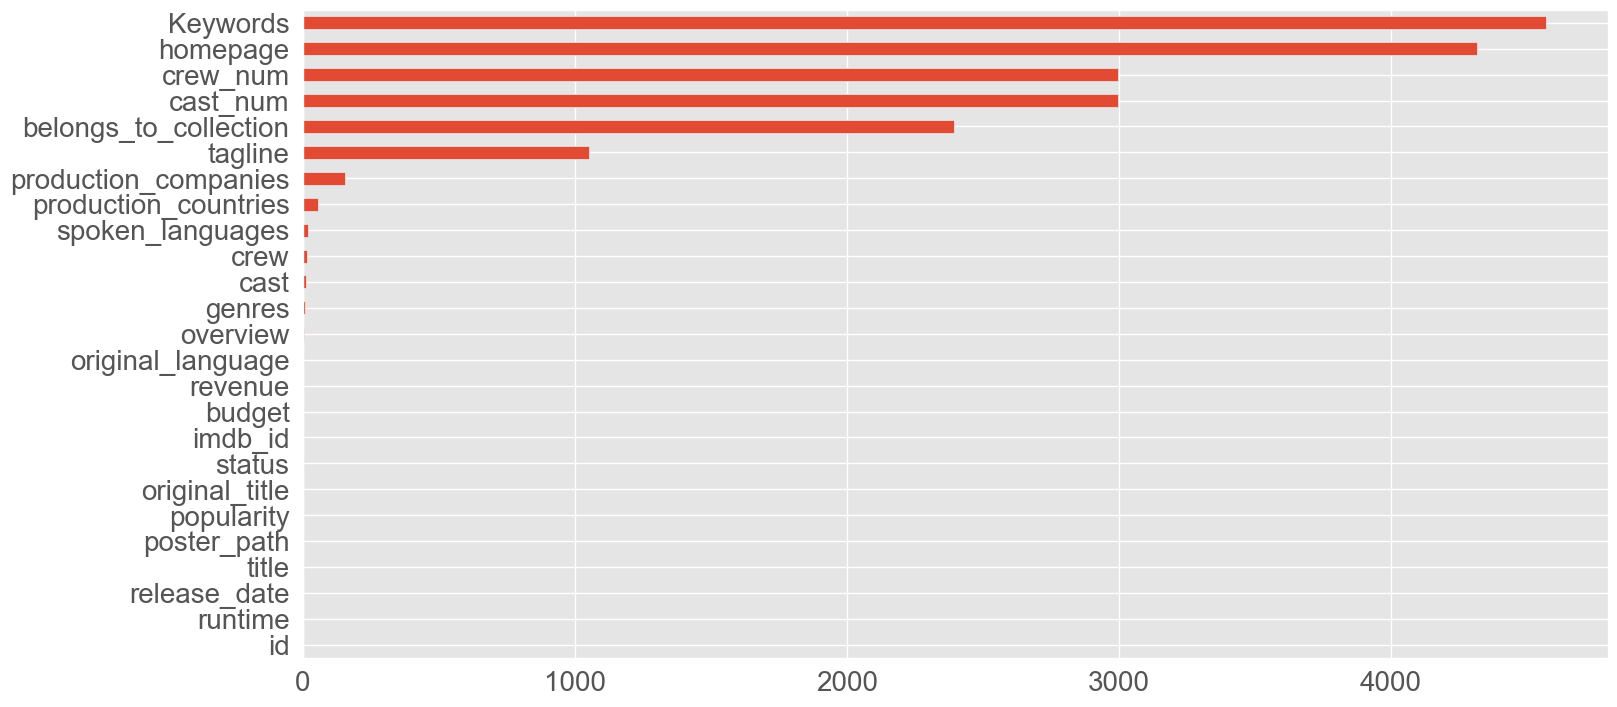

In [7666]:
#Quick peak into NA columns

fig = plt.figure(figsize=(15, 8))
train.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20)

In [7667]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7292 non-null   int64  
 1   belongs_to_collection  4898 non-null   object 
 2   budget                 7292 non-null   int64  
 3   genres                 7285 non-null   object 
 4   homepage               2974 non-null   object 
 5   imdb_id                7292 non-null   object 
 6   original_language      7292 non-null   object 
 7   original_title         7292 non-null   object 
 8   overview               7286 non-null   object 
 9   popularity             7292 non-null   float64
 10  poster_path            7292 non-null   object 
 11  production_companies   7137 non-null   object 
 12  production_countries   7238 non-null   object 
 13  release_date           7292 non-null   object 
 14  runtime                7292 non-null   float64
 15  spok

In [7668]:
# feature we will use
train_features = []
# feature we will log transform
log_features = []
# columns we will drop entirely
cols_to_drop = []

In [7669]:
# function to plot the distribution of a feature
def plot_dist(field, color):
    f, ax = plt.subplots(3, figsize=(10,6))

    sns.set(rc={'figure.figsize':(12,8)})
    sns.boxplot(x=train[field], ax = ax[0], color=color)
    ax[0].set_title(f"Box Plot of {field} variable")
    sns.distplot(a=train[field], kde = False, ax = ax[1], color=color, hist_kws=dict(alpha=1))
    ax[1].set_title(f"Histogram of {field} variable")
    sns.distplot(a=np.log1p(train[field]), kde = False, ax = ax[2], color=color, hist_kws=dict(alpha=1))
    ax[2].set_title(f"Log1p transformed {field} Histogram")
    f.tight_layout()

**Revenue**

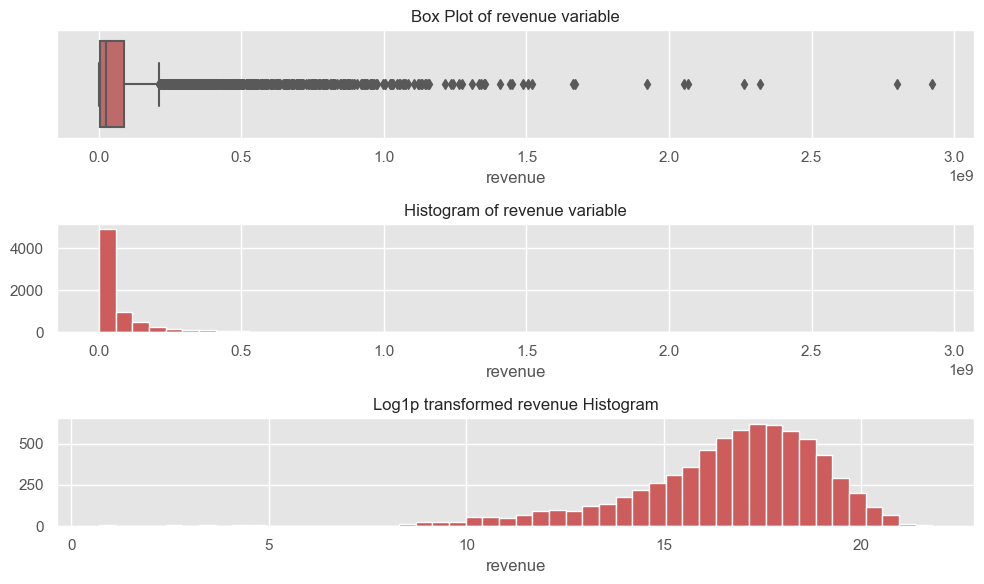

In [7670]:
plot_dist('revenue', 'indianred')

In [7671]:
# Some small revenue to be addressed later
train.revenue.nsmallest(20)

347      1
1753     1
1873     1
1916     1
5831     1
695      2
334      3
1540     3
2381     3
2116     4
1345     5
2488     6
1190     7
639      8
2250     8
2580     8
280     10
665     10
3293    10
1141    11
Name: revenue, dtype: int64

In [7672]:
# revenue data is skewed, therefore apply log transform
log_features.append("revenue")

**belong_to_collection**

In [7673]:
# feature engineering the belong_to_collection column to a binary variable, 0 means no collection, 1 means belong to collection
train.belongs_to_collection = train.belongs_to_collection.apply(lambda x: 1 if (type(x) == str and x != '[null]') else 0)
test.belongs_to_collection = test.belongs_to_collection.apply(lambda x: 1 if (type(x) == str and x != '[null]') else 0)

In [7674]:
print(train.belongs_to_collection.value_counts())

belongs_to_collection
0    5401
1    1891
Name: count, dtype: int64


In [7675]:
# append belings_to_collection to feature list
train_features.append('belongs_to_collection')

**Budget**

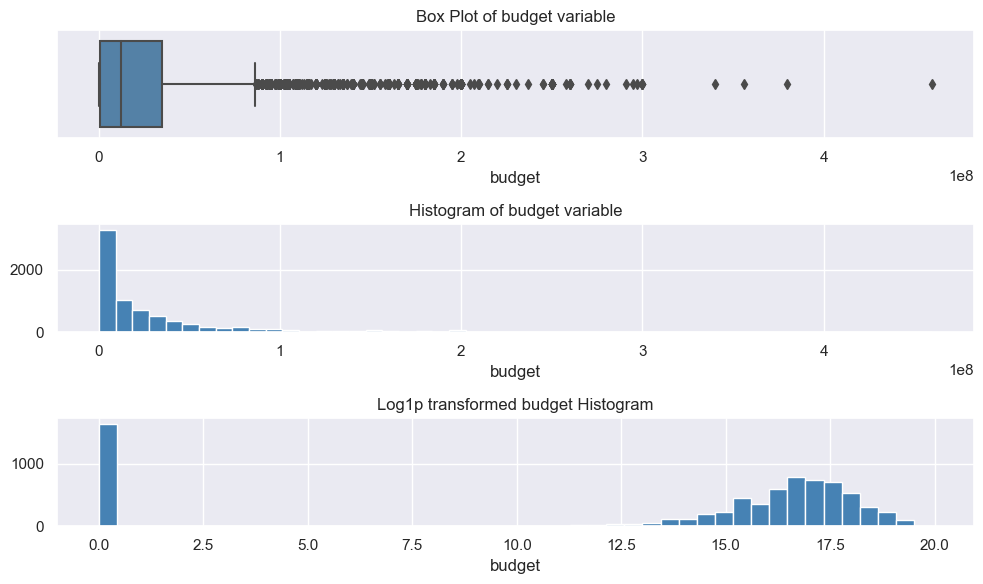

In [7676]:
# plot the distribution of budget
plot_dist('budget', 'steelblue')

In [7677]:
print('Movies with budget listed as 0: ',(train.budget == 0).sum())


Movies with budget listed as 0:  1641


In [7678]:
# replace budget smaller than 10000 with the median budget (among budget > 10000)
median = train.loc[train['budget'] >= 10000, 'budget'].median()
train["budget_processed"] = train["budget"].mask(train["budget"] < 10000, median)
test["budget_processed"] = test["budget"].mask(test["budget"] < 10000, median)

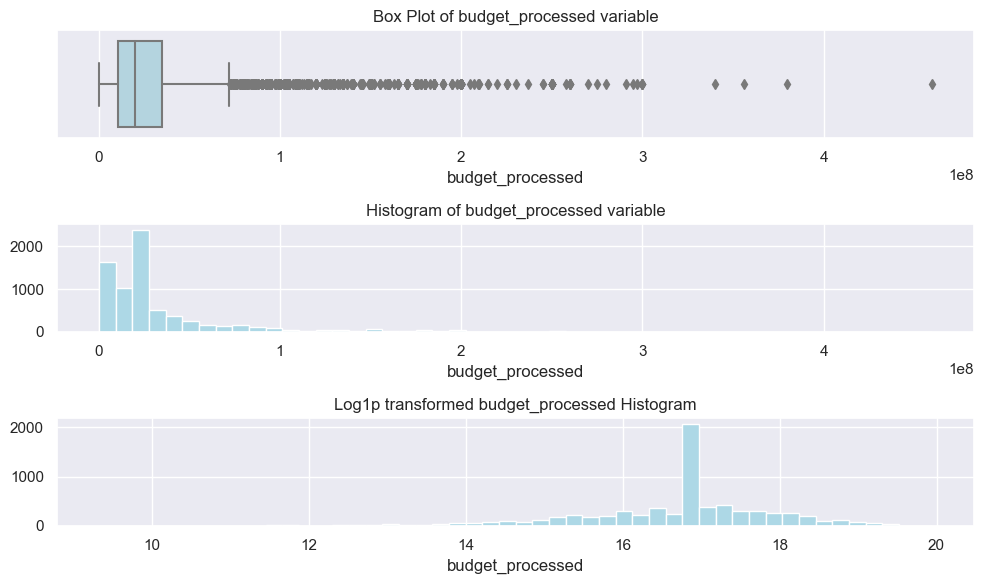

In [7679]:
plot_dist('budget_processed', 'lightblue')

In [7680]:
log_features.append('budget_processed')

**Genres**

In [7681]:
print("Movies misssing genres: ",train['genres'].isna().sum())

Movies misssing genres:  7


In [7682]:
# create a new feature describing the genres of the movie in a list
train['genres'] = train['genres'].fillna('')
train['genres_reform'] = train['genres'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))

test['genres'] = test['genres'].fillna('')
test['genres_reform'] = test['genres'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))

In [7683]:
test['genres_reform'].head()

0    [Adventure, Animation, Family, Fantasy]
1                  [Horror, Science Fiction]
2                          [Comedy, Romance]
3                      [Drama, War, Mystery]
4                     [History, Documentary]
Name: genres_reform, dtype: object

In [7684]:
# Unpack all of the different genres into unique columns
def unpackCol(list, df):
    for i in range(len(df)):
        for name in list[i]:
            if name not in df.columns:
                df[name] = 0
            df[name][i] = 1
    return df

unpackCol(train['genres_reform'], train)

print(train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'cast_num', 'crew_num', 'budget_processed', 'genres_reform', 'Comedy',
       'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation',
       'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie'],
      dtype='object')


In [7685]:
# new feature for a count of the number of genres
train['num_genres'] = train.genres_reform.apply(lambda x: len(x))
test['num_genres'] = test.genres_reform.apply(lambda x: len(x))

train['num_genres'].value_counts()

num_genres
3    2574
2    2239
1    1096
4    1017
5     296
6      58
0       7
7       5
Name: count, dtype: int64

,number_of_movies
Drama,3295
Comedy,2378
Action,2028
Thriller,1998
Adventure,1387
Romance,1247
Crime,1095
Horror,917
Science Fiction,875
Fantasy,846


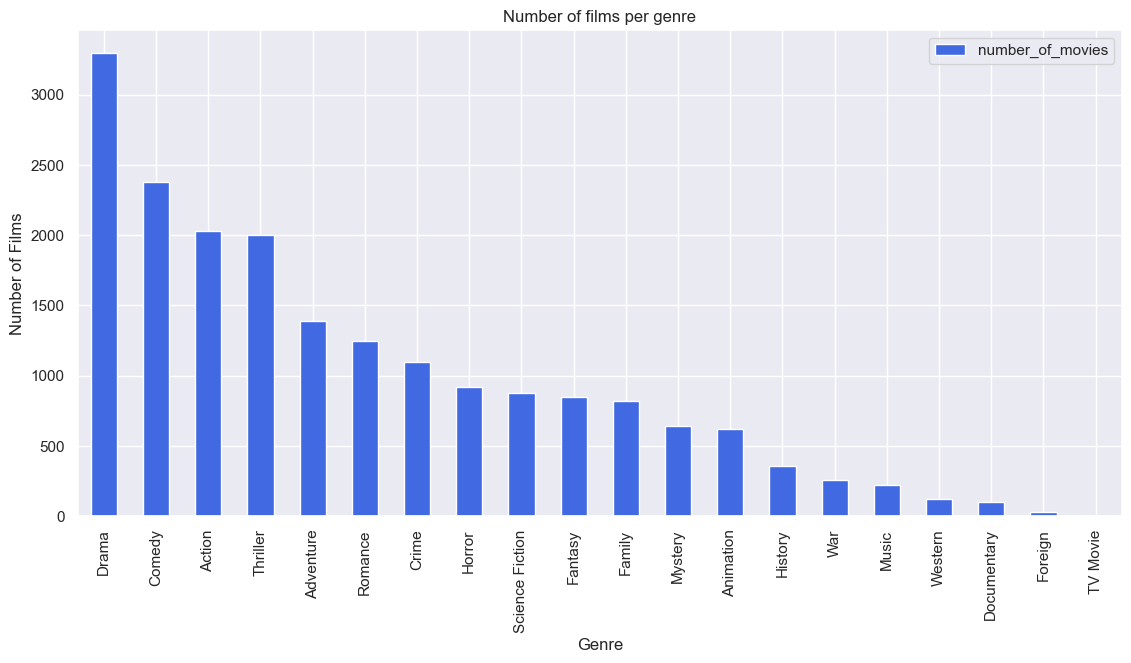

In [7686]:
# plotting genres in order of number of instances in the df.csv dataset
genresDict = dict()

for genre in train["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1

sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")
genres_df

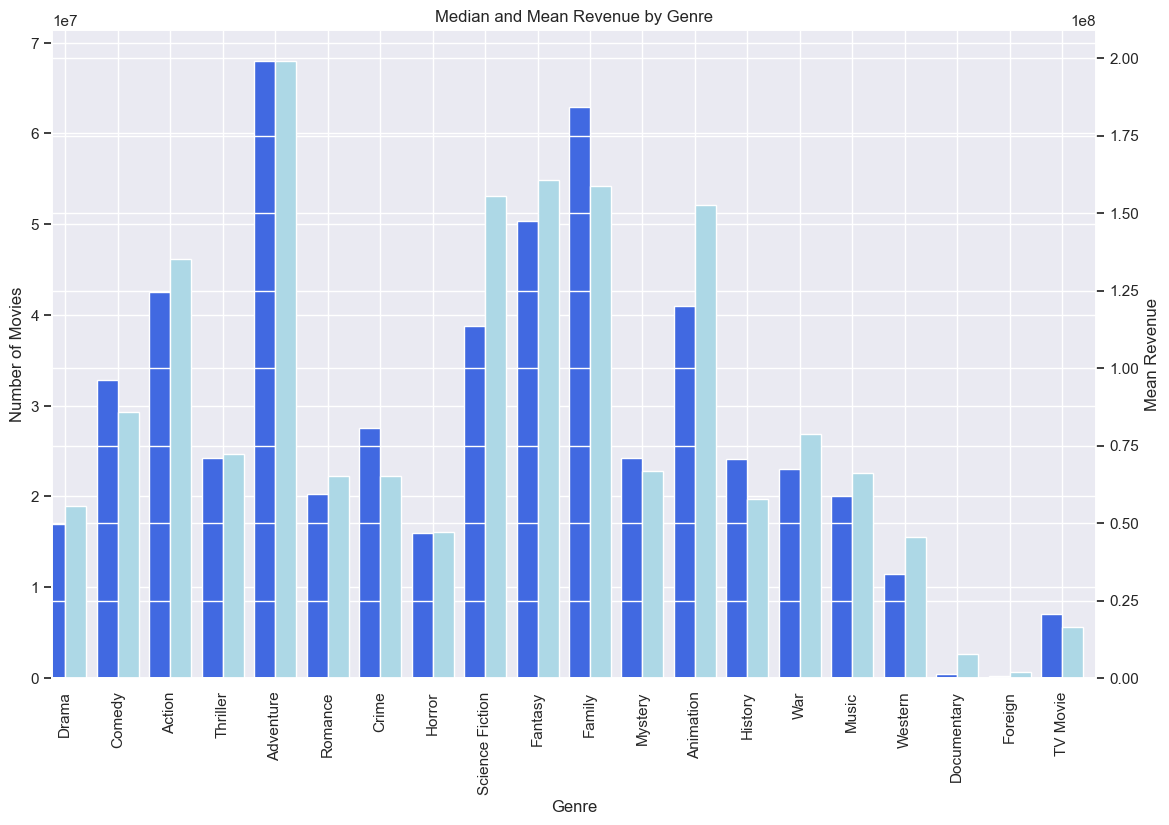

In [7687]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
genres_df.index.values
for g in genres_df.index.values:
    train[g] = train['genres_reform'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_rev"] = train[train[g]==1].revenue.median()
    
genres_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "mean_rev"] = train[train[g]==1].revenue.mean()

genres_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

# plot the mean and median revenue for each genre
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

genres_df.median_rev.plot(kind='bar', color='royalblue', ax=ax, width=width, position=1)
genres_df.mean_rev.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)
ax.set_ylabel('Number of Movies')
ax2.set_ylabel('Mean Revenue')
ax.set_xlabel('Genre')
plt.title('Median and Mean Revenue by Genre')
plt.show()


<Axes: >

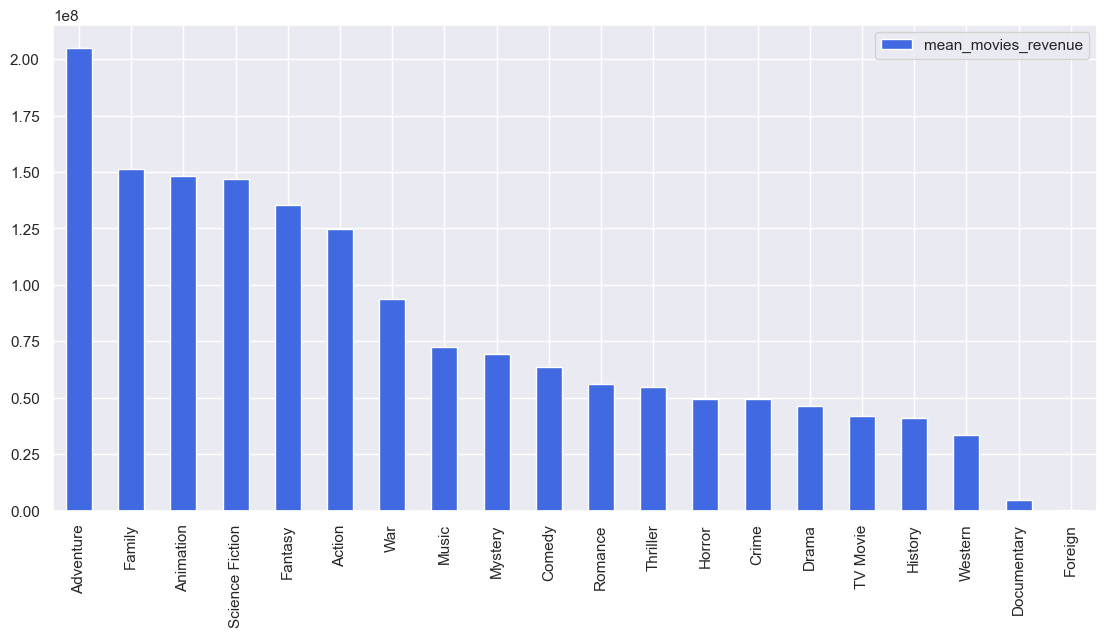

In [7688]:
# genres by mean revenue when only looking at the first genre
topGenreDict = {}
for element in train[["revenue", "genres_reform"]].values:
    count = 1
    if len(element[1]) < count:
        count = len(element[1])
    for i in range(count):
        if element[1][i] not in topGenreDict:
            topGenreDict[element[1][i]] = [element[0], 1]
        else:
            topGenreDict[element[1][i]][0] += element[0] 
            topGenreDict[element[1][i]][1] += 1    

for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0] / topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0] 
    
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')

In [7689]:
# Sort both of our dicts of genres and top genres to more easily access the 'most successful genres'
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse = False)}
genresDict = {k: v for k, v in sorted(genresDict.items(), key=lambda item: item[1], reverse = True)}
print(topGenreDict)
print(genresDict)

{'Foreign': 140650.0, 'Documentary': 4615048.493670886, 'Western': 33356350.55102041, 'History': 41069962.35897436, 'TV Movie': 42000000.0, 'Drama': 46239358.74847747, 'Crime': 49213413.88588589, 'Horror': 49640385.27651515, 'Thriller': 54882996.24852071, 'Romance': 56104229.729166664, 'Comedy': 63781699.7449298, 'Mystery': 69541143.47058824, 'Music': 72571691.8, 'War': 93683577.06451613, 'Action': 124855251.00239426, 'Fantasy': 135391406.55675676, 'Science Fiction': 146793944.0, 'Animation': 148311033.66761363, 'Family': 151403397.84210527, 'Adventure': 205076954.44444445}
{'Drama': 3295, 'Comedy': 2378, 'Action': 2028, 'Thriller': 1998, 'Adventure': 1387, 'Romance': 1247, 'Crime': 1095, 'Horror': 917, 'Science Fiction': 875, 'Fantasy': 846, 'Family': 819, 'Mystery': 640, 'Animation': 619, 'History': 357, 'War': 253, 'Music': 222, 'Western': 118, 'Documentary': 99, 'Foreign': 31, 'TV Movie': 3}


In [7690]:
def getGenreRank(genres):
    sum = 0
    for g in genres:
        sum += list(topGenreDict.keys()).index(g)
    return (sum / len(genres))

train['genre_rank'] = train['genres_reform'].apply(lambda x: getGenreRank(x) if len(x) > 0 else 0)
test['genre_rank'] = test['genres_reform'].apply(lambda x: getGenreRank(x) if len(x) > 0 else 0)

train['genre_rank'].value_counts()

genre_rank
7.000000     503
10.000000    493
5.000000     483
7.500000     433
8.000000     418
            ... 
10.200000      1
15.571429      1
7.200000       1
1.500000       1
12.285714      1
Name: count, Length: 143, dtype: int64

In [7691]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['genre_rank'], train['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['genre_rank']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed genre_rank and log transformed revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.320
Pearsons correlation between log transformed genre_rank and log transformed revenue: 0.294


In [7692]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_genres'], train['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_genres']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed num_genres and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.155
Pearsons correlation between log transformed num_genres and log transformed revenue: 0.183


In [7693]:
log_features.append('genre_rank')
log_features.append('num_genres')

**Homepage**

In [7694]:
train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
test['has_homepage'] = test.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
train['has_homepage'].value_counts()

has_homepage
0    4318
1    2974
Name: count, dtype: int64

In [7695]:
print("Mean revenue for movies with a homepage: %.2f" % train.loc[train['has_homepage'] == 1, "revenue"].mean())
print("Median revenue for movies with a homepage: %.2f" % train.loc[train['has_homepage'] == 1, "revenue"].median())
print()
print("Mean revenue for movies without a homepage: %.2f" % train.loc[train['has_homepage'] == 0, "revenue"].mean())
print("Median revenue for movies without a homepage: %.2f" % train.loc[train['has_homepage'] == 0, "revenue"].median())


Mean revenue for movies with a homepage: 138550776.58
Median revenue for movies with a homepage: 43303162.50

Mean revenue for movies without a homepage: 50510478.00
Median revenue for movies without a homepage: 17768384.50


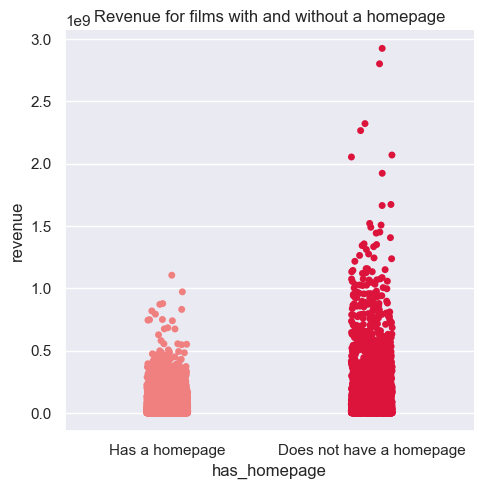

In [7696]:
pal1 = ['lightcoral', 'crimson']

ax = sns.catplot(x='has_homepage', y='revenue', data=train, palette=pal1)
plt.title('Revenue for films with and without a homepage')

labels = 'Has a homepage', 'Does not have a homepage'
ax.set_xticklabels(labels)

In [7697]:
train_features.append('has_homepage')

**IMDB_ID**

In [7698]:
cols_to_drop.append("imdb_id")

**Original Language**

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

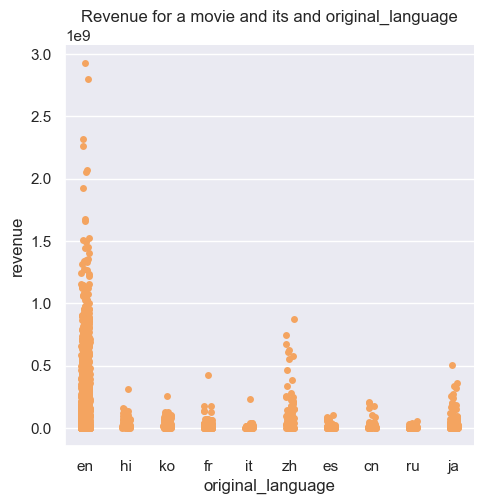

In [7699]:
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

In [7700]:
#Creating new feature
train['originally_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
test['originally_english'] = test.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['originally_english'].value_counts()

originally_english
1    6158
0    1134
Name: count, dtype: int64

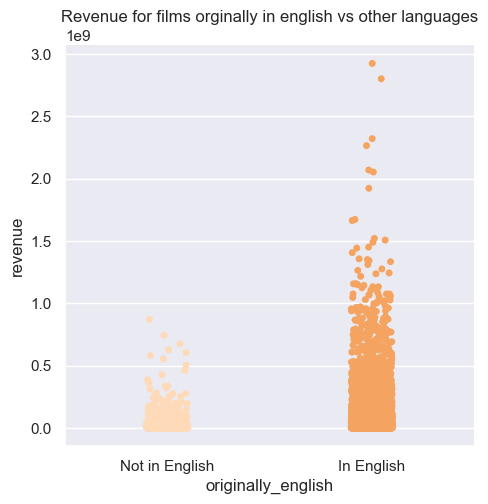

In [7701]:
pal2 = ['peachpuff', 'sandybrown']

ax = sns.catplot(x='originally_english', y='revenue', data=train, palette=pal2);
plt.title('Revenue for films orginally in english vs other languages');

labels = 'Not in English', 'In English'
ax.set_xticklabels(labels)

,number_of_movies
en,6158
ja,232
fr,179
es,103
ko,96
zh,80
ru,79
hi,67
cn,55
it,55


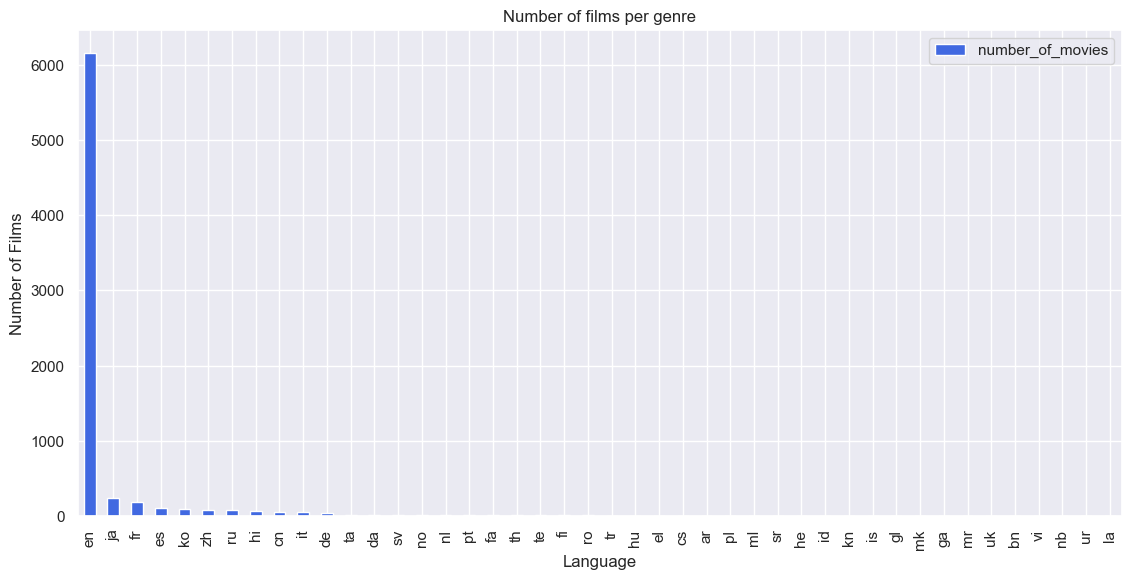

In [7702]:
lanDict = dict()

for lan in train["original_language"]:
    if lan not in lanDict:
        lanDict[lan] = 1
    else:
        lanDict[lan] += 1
        
sns.set(rc={'figure.figsize':(12,6)})
lan_df = pd.DataFrame.from_dict(lanDict, orient='index')
lan_df.columns = ["number_of_movies"]
lan_df = lan_df.sort_values(by="number_of_movies", ascending=False)
lan_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Language")
lan_df.head(10)

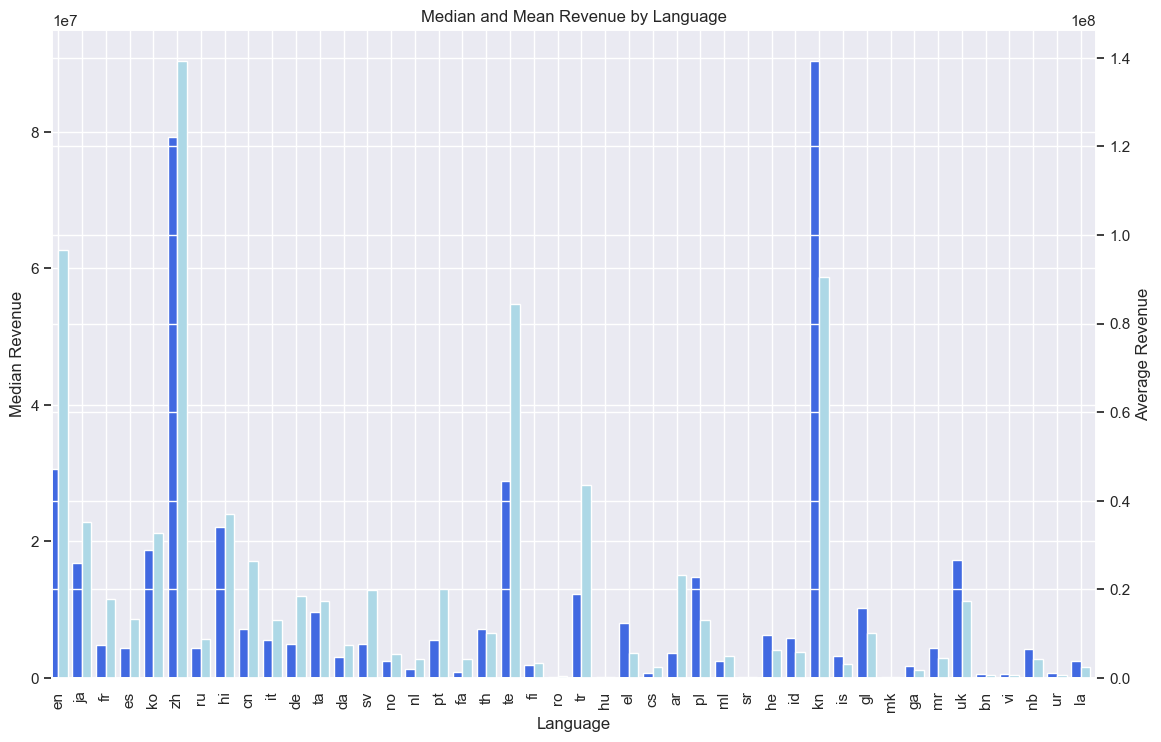

In [7703]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
for g in lan_df.index.values:
    train[g] = train['original_language'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "median_rev"] = train[train[g]==1].revenue.median()
    
lan_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(lan_df.index.values):
    lan_df.loc[g, "mean_rev"] = train[train[g]==1].revenue.mean()

lan_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

# plot the mean and median revenue for each genre
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

lan_df.median_rev.plot(kind='bar', color='royalblue', ax=ax, width=width, position=1)
lan_df.mean_rev.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)
ax.set_ylabel('Median Revenue')
ax2.set_ylabel('Average Revenue')
ax.set_xlabel('Language')
plt.title('Median and Mean Revenue by Language')
plt.show()

In [7704]:

#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['originally_english'], train['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.134


In [7705]:
train_features.append('originally_english')

**Original Title**

In [7706]:
cols_to_drop.append('original_title')

**Overview**

In [7707]:
cols_to_drop.append('overview')

**Popularity**

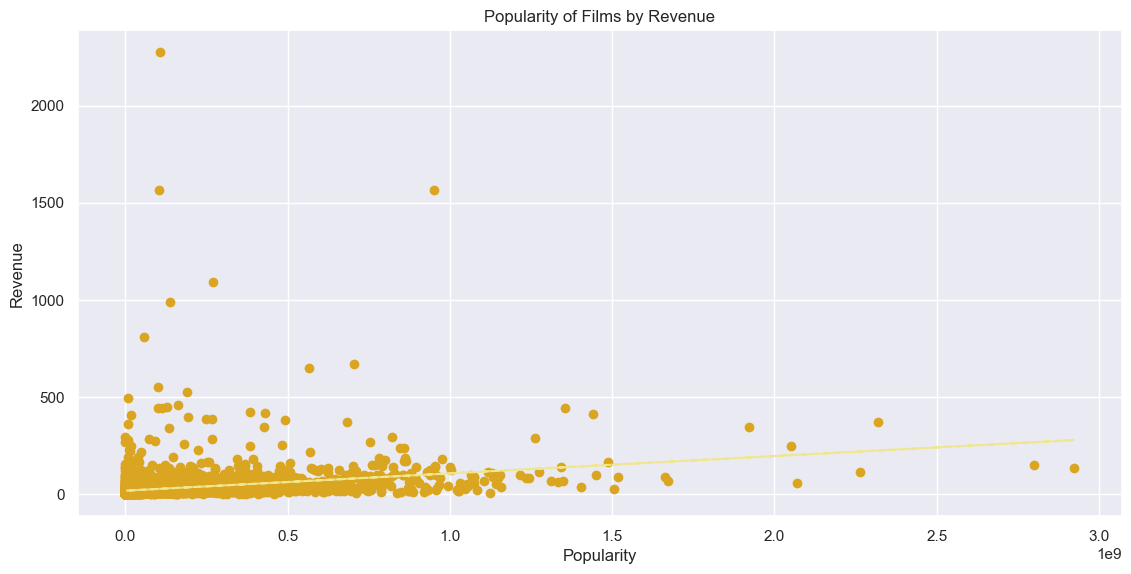

In [7708]:
# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = train['revenue']
pop = train['popularity']
plt.plot(cx, pop, 'o', color='goldenrod')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='khaki')

In [7709]:
#analysis of correlation
corr, _ = pearsonr(train['popularity'], train['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['popularity']), np.log1p(train['revenue']))
print('Pearsons correlation between log popularity and log revenue: %.3f' % corr)


Pearsons correlation between popularity and revenue: 0.290
Pearsons correlation between log popularity and log revenue: 0.453


In [7710]:
# log_features.append('popularity')

**Poster Path**

In [7711]:
cols_to_drop.append('poster_path')

**Production Companies**

In [7712]:
train['production_companies'] = train['production_companies'].fillna('')
train['production_companies_reform'] = train['production_companies'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))

test['production_companies'] = test['production_companies'].fillna('')
test['production_companies_reform'] = test['production_companies'].apply(lambda x:re.findall("'name':\s*\'(.+?)\'", x))


In [7713]:
# new column for a count of the number of production studios
train['num_studios'] = train.production_companies_reform.apply(lambda x: len(x))
test['num_studios'] = test.production_companies_reform.apply(lambda x: len(x))

train['num_studios'].value_counts()

num_studios
2     1700
3     1488
1     1382
4      942
5      597
6      401
7      235
0      164
8      147
9       96
10      45
11      32
12      15
13      15
15       7
14       7
16       6
17       4
20       2
18       2
22       2
26       2
21       1
Name: count, dtype: int64

,movies per company
Universal Pictures,486
Columbia Pictures,337
Warner Bros. Pictures,315
Paramount,236
20th Century Fox,211
...,...
Pie Films Inc.,1
Rifilm,1
Studio Image 4,1
Cofimage 9,1


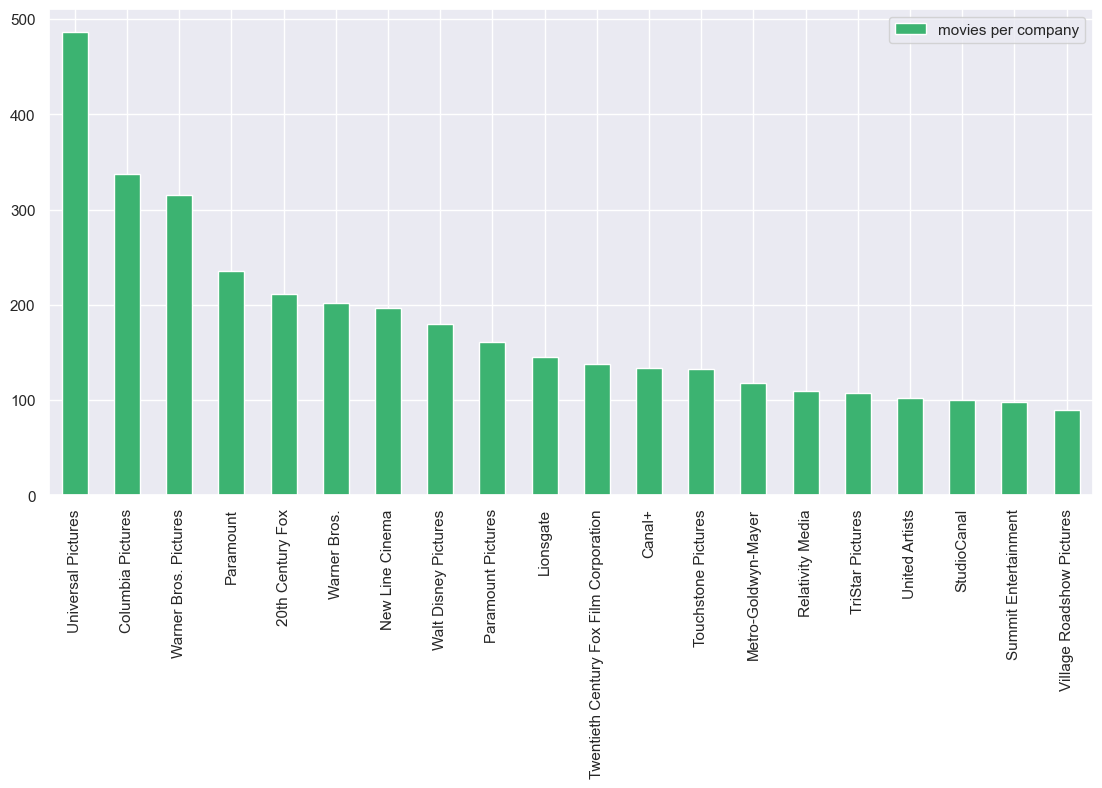

In [7714]:
# production companies
companiesDict = {}
for element in train["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict:
            companiesDict[company] = 1
        else:
            companiesDict[company] += 1

companies_train = pd.DataFrame.from_dict(companiesDict, orient='index', columns=["movies per company"])
companies_train.sort_values(by="movies per company", ascending=False).head(20).plot.bar(color='mediumseagreen')

companies_train.sort_values(by="movies per company", ascending=False)

Text(0.5, 0, 'Production Studio')

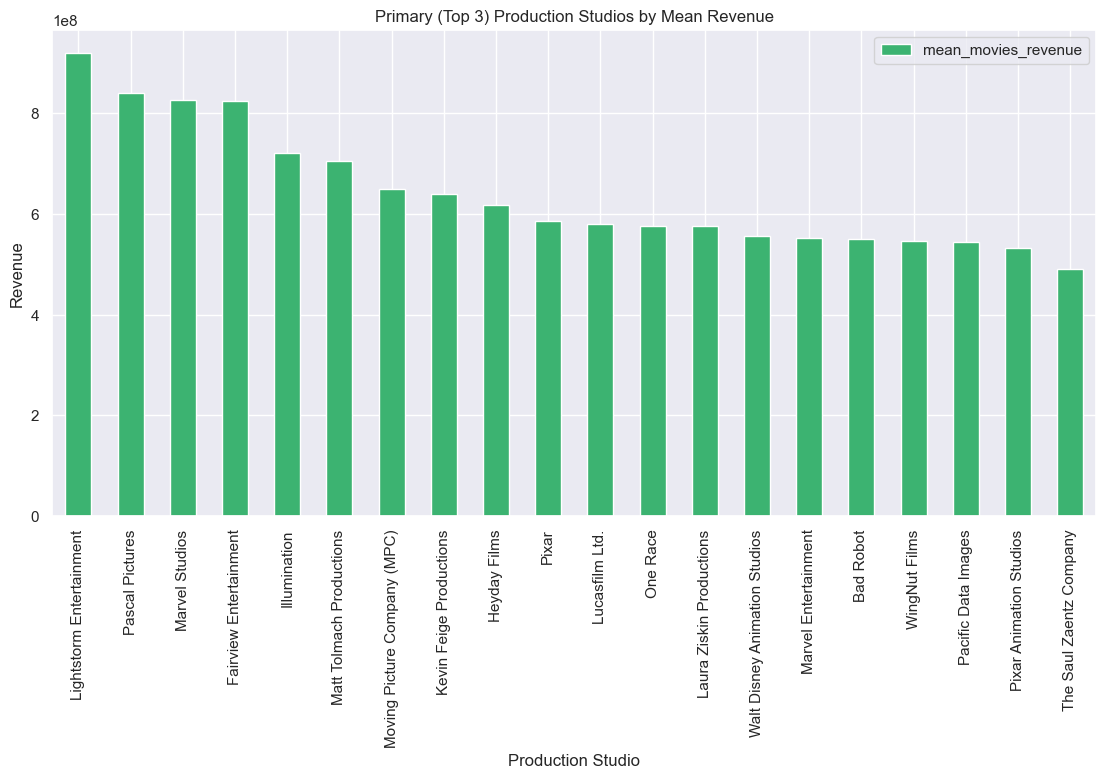

In [7715]:
# isolating the primary production studios for the films
studiosDict = {}
for element in train[["revenue", "production_companies_reform"]].values:
   # compare results when looking at x top production companies in films vs all affiliated studios 
    temp = 3
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in studiosDict:
            studiosDict[element[1][i]] = [element[0], 1]
        else:
            studiosDict[element[1][i]][0] += element[0]
            studiosDict[element[1][i]][1] += 1    

studiosDict = {k: v for k, v in studiosDict.items() if v[1] >= 3}

for company in studiosDict:
    studiosDict[company][0] = studiosDict[company][0]/studiosDict[company][1]
    studiosDict[company] = studiosDict[company][0]


    
    
studios_train = pd.DataFrame.from_dict(studiosDict, orient='index', columns=["mean_movies_revenue"])
studios_train.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar(color='mediumseagreen')
plt.title("Primary (Top 3) Production Studios by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

<Axes: >

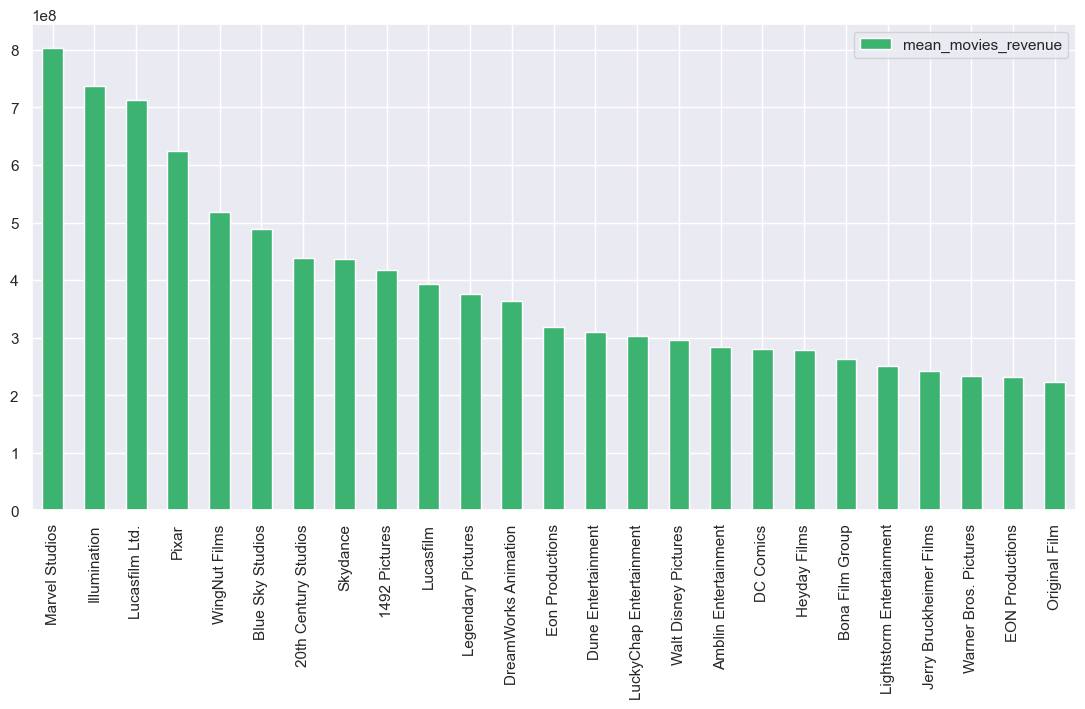

In [7716]:
topStudiosDict = {}
for element in train[["revenue", "production_companies_reform"]].values:
   # compare results when looking at x top studios
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in topStudiosDict:
            topStudiosDict[element[1][i]] = [element[0], 1]
        else:
            topStudiosDict[element[1][i]][0] += element[0]
            topStudiosDict[element[1][i]][1] += 1    

topStudiosDict = {k: v for k, v in topStudiosDict.items() if v[1] >= 5}

for company in topStudiosDict:
    topStudiosDict[company][0] = topStudiosDict[company][0]/topStudiosDict[company][1]
    topStudiosDict[company] = topStudiosDict[company][0]


    
    
studios_df = pd.DataFrame.from_dict(topStudiosDict, orient='index', columns=["mean_movies_revenue"])
studios_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='mediumseagreen')

In [7717]:
# Sort both of our dicts of studios and top studios to more easily access the 'most successful studios'
topStudiosDict = {k: v for k, v in sorted(topStudiosDict.items(), key=lambda item: item[1], reverse = True)}
studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top studio'
def checkTopStudios(studio):
    if len(studio) < 1 or studio[0] not in list(topStudiosDict)[:50]:
        return 0
    else:
        return 1

def checkStudios(studio):
    if len(studio) < 1:
        return 0
    count = 0
    for company in studio[:10]:
        if company in list(studiosDict)[:100]:
            count += 1
    return count

def getStudioRanks(studios):
    if len(studios) < 1:
        return 400
    rank = 0
    for s in studios[:5]:
        if s in list(studiosDict):
            rank += list(studiosDict.keys()).index(s)
    if rank == 0:
        rank = 400
    return rank / len(studios)

#Creating a feature for top production studios
train['topStudio'] = train['production_companies_reform'].apply(lambda x: checkTopStudios(x))
test['topStudio'] = test['production_companies_reform'].apply(lambda x: checkTopStudios(x))
#Creating feature for number of top studios
train['numTopStudios'] = train['production_companies_reform'].apply(lambda x: checkStudios(x))
test['numTopStudios'] = test['production_companies_reform'].apply(lambda x: checkStudios(x))

studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse = True)}

#Creating feature for number of top studios
train['studioRank'] = train['production_companies_reform'].apply(lambda x: getStudioRanks(x))
test['studioRank'] = test['production_companies_reform'].apply(lambda x: getStudioRanks(x))

print(train['topStudio'].value_counts())
print()
print(train['numTopStudios'].value_counts())
print()
print(train['studioRank'].value_counts())

topStudio
0    6069
1    1223
Name: count, dtype: int64

numTopStudios
0    6241
1     765
2     234
3      48
4       2
5       2
Name: count, dtype: int64

studioRank
400.000000    550
200.000000    212
133.333333    135
196.000000     64
100.000000     63
             ... 
126.833333      1
321.666667      1
49.500000       1
364.800000      1
55.666667       1
Name: count, Length: 3042, dtype: int64


In [7718]:
# analysis of correlation and create log feature
corr, _ = pearsonr(train['topStudio'], train['revenue'])
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topStudio'], np.log1p(train['revenue']))
print('Pearsons correlation between log1p topStudio and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(train['numTopStudios'], train['revenue'])
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopStudios']), np.log1p(train['revenue']))
print('Pearsons correlation between log1p numTopStudios and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(train['studioRank'], train['revenue'])
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['studioRank']), np.log1p(train['revenue']))
print('Pearsons correlation between log1p studioRank and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(train['num_studios'], train['revenue'])
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_studios']), np.log1p(train['revenue']))
print('Pearsons correlation between log1p num_studios and revenue: %.3f' % corr)

Pearsons correlation between topStudio and revenue: 0.385
Pearsons correlation between log1p topStudio and revenue: 0.318

Pearsons correlation between numTopStudios and revenue: 0.557
Pearsons correlation between log1p numTopStudios and revenue: 0.355

Pearsons correlation between studioRank and revenue: -0.310
Pearsons correlation between log1p studioRank and revenue: -0.302

Pearsons correlation between num_studios and revenue: 0.025
Pearsons correlation between log1p num_studios and revenue: 0.180


In [7719]:
log_features.append('topStudio')
train_features.append('numTopStudios')
log_features.append('num_studios')
log_features.append('studioRank')

**Production Countries**

<Axes: xlabel='num_production_countries', ylabel='count'>

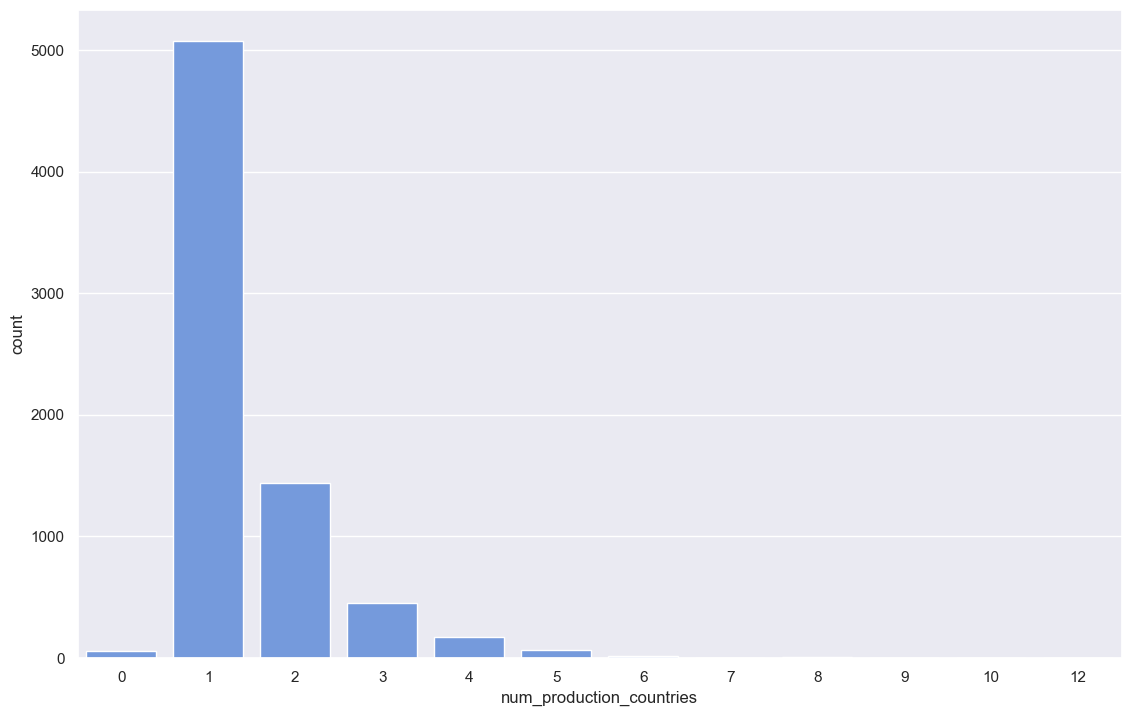

In [7720]:
train.production_countries = train.production_countries.fillna("")
train['production_countries_processed'] = train['production_countries'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

train['num_production_countries'] = train['production_countries_processed'].apply(lambda x: len(x))

test.production_countries = test.production_countries.fillna("")
test['production_countries_processed'] = test['production_countries'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

test['num_production_countries'] = test['production_countries_processed'].apply(lambda x: len(x))

sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=train.num_production_countries, color='cornflowerblue')

(97, 1)

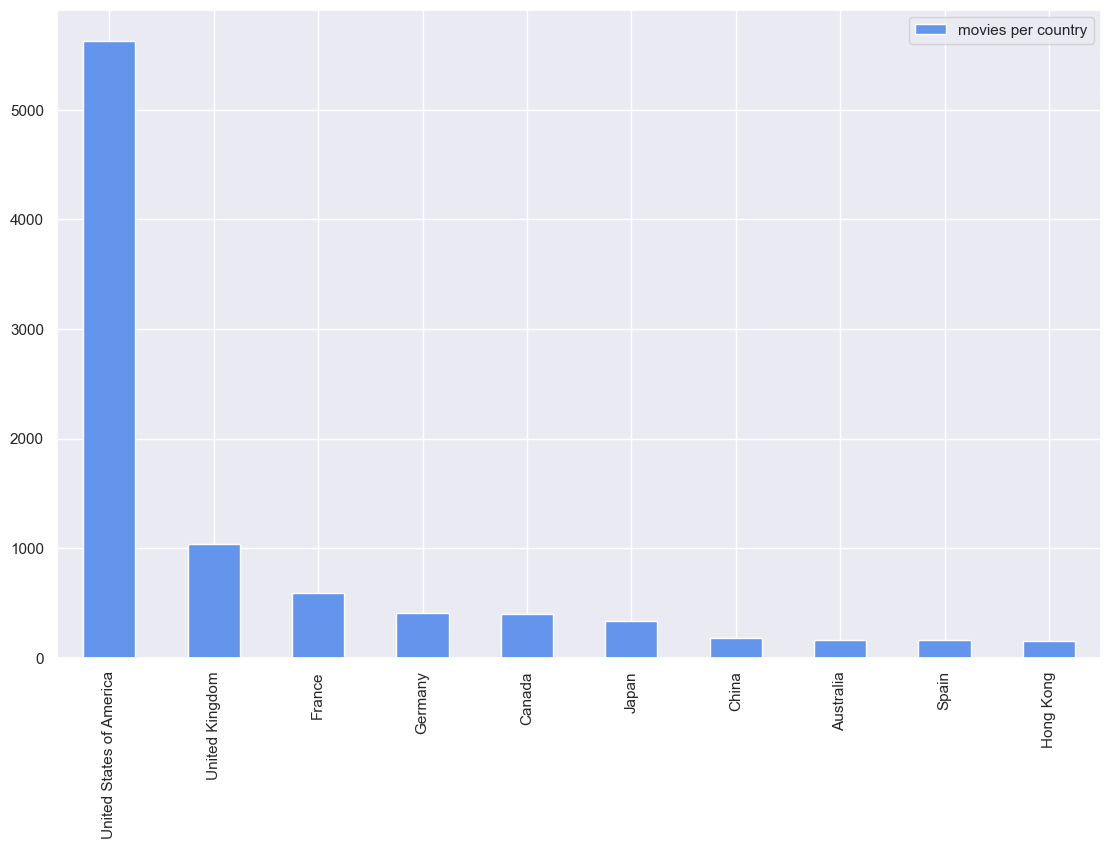

In [7721]:
# get distribution of number of production countries
countriesDict = {}
for element in train["production_countries_processed"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_train = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_train.sort_values(by="movies per country", ascending=False).head(10).plot.bar(color='cornflowerblue')
countries_train.shape

In [7722]:
#Creating new feature
train['usa_produced'] = train.production_countries_processed.apply(lambda x: 1 if 'United States of America' in x else 0)
test['usa_produced'] = test.production_countries_processed.apply(lambda x: 1 if 'United States of America' in x else 0)
train['usa_produced'].value_counts()

usa_produced
1    5633
0    1659
Name: count, dtype: int64

<Axes: >

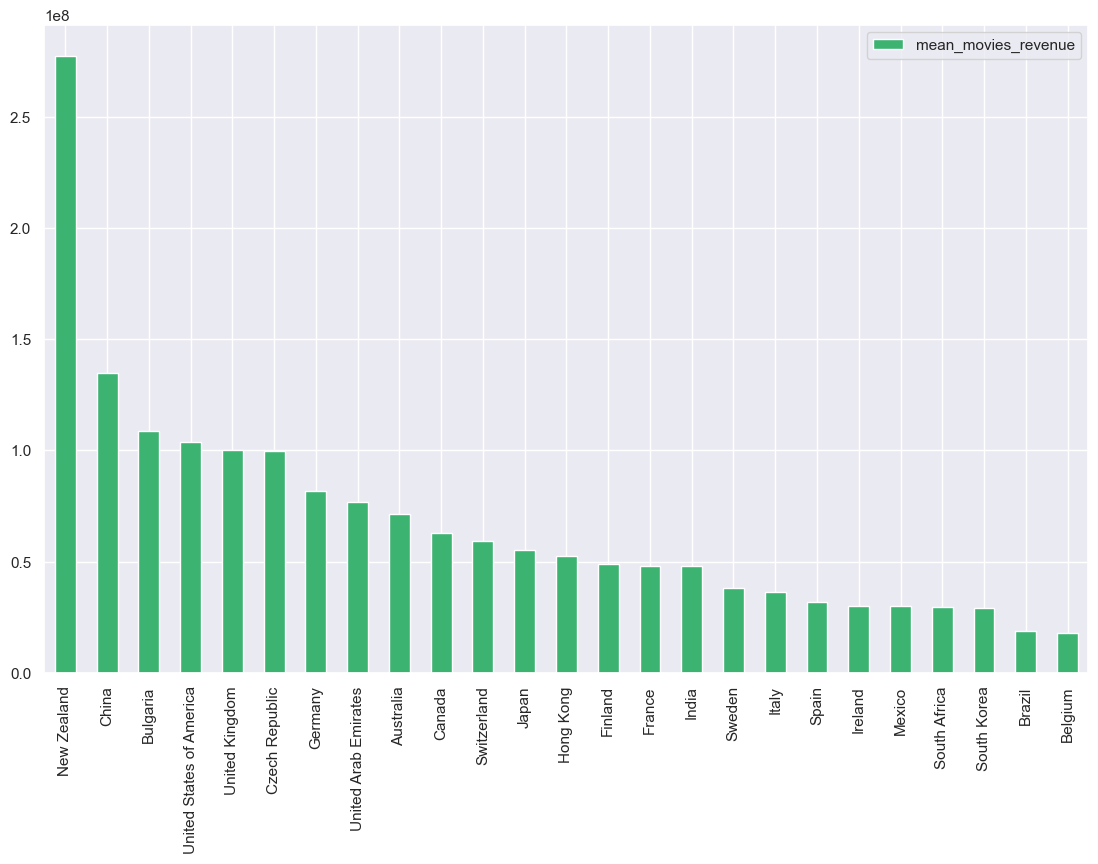

In [7723]:

topCountryDict = {}
for element in train[["revenue", "production_countries_processed"]].values:
   # compare results when looking at x top studios
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in topCountryDict:
            topCountryDict[element[1][i]] = [element[0], 1]
        else:
            topCountryDict[element[1][i]][0] += element[0]
            topCountryDict[element[1][i]][1] += 1    

topCountryDict = {k: v for k, v in topCountryDict.items() if v[1] >= 10}

for country in topCountryDict:
    topCountryDict[country][0] = topCountryDict[country][0]/topCountryDict[country][1]
    topCountryDict[country] = topCountryDict[country][0]


    
    
country_df = pd.DataFrame.from_dict(topCountryDict, orient='index', columns=["mean_movies_revenue"])
country_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='mediumseagreen')

In [7724]:
# Sort both of our dicts of top countries to more easily access the 'most successful countries'
topCountryDict = {k: v for k, v in sorted(topCountryDict.items(), key=lambda item: item[1], reverse = True)}

# function to check if lead role is a 'top studio'
def checkTopStudios(country):
    if len(country) < 1 or country[0] not in list(topCountryDict)[:10]:
        return 0
    else:
        return 1
    
# function to get the rank of the country
def getCountryRank(countries):
    if len(countries) < 1:
        return 100
    rank = 0
    for c in countries[:5]:
        if c in list(topCountryDict):
            rank += list(topCountryDict.keys()).index(c)
    if rank == 0:
        rank = 100
    return rank / len(countries)

#Creating a feature for top production studios
train['topCountry'] = train['production_countries_processed'].apply(lambda x: checkTopStudios(x))
test['topCountry'] = test['production_countries_processed'].apply(lambda x: checkTopStudios(x))
#Creating feature for rank of country
train['countryRank'] = train['production_countries_processed'].apply(lambda x: getCountryRank(x))
test['countryRank'] = test['production_countries_processed'].apply(lambda x: getCountryRank(x))

print(train['topCountry'].value_counts())
print()
print(train['countryRank'].value_counts())


topCountry
1    5623
0    1669
Name: count, dtype: int64

countryRank
3.00     3994
3.50      374
11.00     239
6.00      238
4.00      193
         ... 
4.60        1
11.75       1
2.25        1
9.20        1
6.25        1
Name: count, Length: 159, dtype: int64


In [7725]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['num_production_countries'], train['revenue'])
print('Pearsons correlation between num_production_countries and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_production_countries']), np.log1p(train['revenue']))
print('Pearsons correlation between log1p num_production_countries and log1p revenue: %.3f' % corr)
print()

corr, _ = pearsonr(train['topCountry'], train['revenue'])
print('Pearsons correlation between topCountry and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topCountry'], np.log1p(train['revenue']))
print('Pearsons correlation between log1p topCountry and revenue: %.3f' % corr)
print()

# correlation analysis and create log feature
corr, _ = pearsonr(train['countryRank'], train['revenue'])
print('Pearsons correlation between countryRank and revenue: %.3f' % corr)
corr, _ = pearsonr(train['countryRank'], np.log1p(train['revenue']))
print('Pearsons correlation between log1p countryRank and revenue: %.3f' % corr)
print()

# calculate Pearson's correlation
corr, _ = pearsonr(train['usa_produced'], train['revenue'])
print('Pearsons correlation between usa_produced and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['usa_produced']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed usa_produced and log transformed revenue: %.3f' % corr)


Pearsons correlation between num_production_countries and revenue: -0.022
Pearsons correlation between log1p num_production_countries and log1p revenue: 0.032

Pearsons correlation between topCountry and revenue: 0.152
Pearsons correlation between log1p topCountry and revenue: 0.194

Pearsons correlation between countryRank and revenue: -0.115
Pearsons correlation between log1p countryRank and revenue: -0.233

Pearsons correlation between usa_produced and revenue: 0.181
Pearsons correlation between log transformed usa_produced and log transformed revenue: 0.276


In [7726]:
# add to feature list
log_features.append('num_production_countries')
log_features.append('topCountry')
log_features.append('countryRank')
train_features.append('usa_produced')

**Release Date**

In [7727]:
train['release_date'].head(10)


0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
5      8/6/87
6     8/30/12
7     1/15/04
8     2/16/96
9     4/16/03
Name: release_date, dtype: object

In [7728]:
# release date data manipulation
# naming a date-specific dataframe for housekeeping
train_date = train['release_date']

# converting to datetime format, with .dt used for accessing quantities
train_date = pd.to_datetime(train_date)
train_date.dt
print(train_date)

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
7287   1988-12-02
7288   2016-12-14
7289   2014-12-24
7290   2017-03-22
7291   2022-07-13
Name: release_date, Length: 7292, dtype: datetime64[ns]


In [7729]:
# possible output options
print(train_date.dt.year) 
print(train_date.dt.dayofweek) 
print(train_date.dt.dayofyear) 
print(train_date.dt.isocalendar().week) 

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
7287    1988
7288    2016
7289    2014
7290    2017
7291    2022
Name: release_date, Length: 7292, dtype: int32
0       4
1       4
2       4
3       4
4       3
       ..
7287    4
7288    2
7289    2
7290    2
7291    2
Name: release_date, Length: 7292, dtype: int32
0        51
1       219
2       283
3        69
4        36
       ... 
7287    337
7288    349
7289    358
7290     81
7291    194
Name: release_date, Length: 7292, dtype: int32
0        8
1       32
2       41
3       10
4        6
        ..
7287    48
7288    50
7289    52
7290    12
7291    28
Name: week, Length: 7292, dtype: UInt32


[Text(0, 0, '1920'),
 Text(1, 0, '1925'),
 Text(2, 0, '1926'),
 Text(3, 0, '1927'),
 Text(4, 0, '1930'),
 Text(5, 0, '1931'),
 Text(6, 0, '1933'),
 Text(7, 0, '1934'),
 Text(8, 0, '1935'),
 Text(9, 0, '1936'),
 Text(10, 0, '1937'),
 Text(11, 0, '1938'),
 Text(12, 0, '1939'),
 Text(13, 0, '1940'),
 Text(14, 0, '1941'),
 Text(15, 0, '1942'),
 Text(16, 0, '1943'),
 Text(17, 0, '1944'),
 Text(18, 0, '1946'),
 Text(19, 0, '1947'),
 Text(20, 0, '1948'),
 Text(21, 0, '1949'),
 Text(22, 0, '1950'),
 Text(23, 0, '1951'),
 Text(24, 0, '1952'),
 Text(25, 0, '1953'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1959'),
 Text(32, 0, '1960'),
 Text(33, 0, '1961'),
 Text(34, 0, '1962'),
 Text(35, 0, '1963'),
 Text(36, 0, '1964'),
 Text(37, 0, '1965'),
 Text(38, 0, '1966'),
 Text(39, 0, '1967'),
 Text(40, 0, '1968'),
 Text(41, 0, '1969'),
 Text(42, 0, '1970'),
 Text(43, 0, '1971'),
 Text(44, 0, '1972'),
 Text(45, 0, '1973')

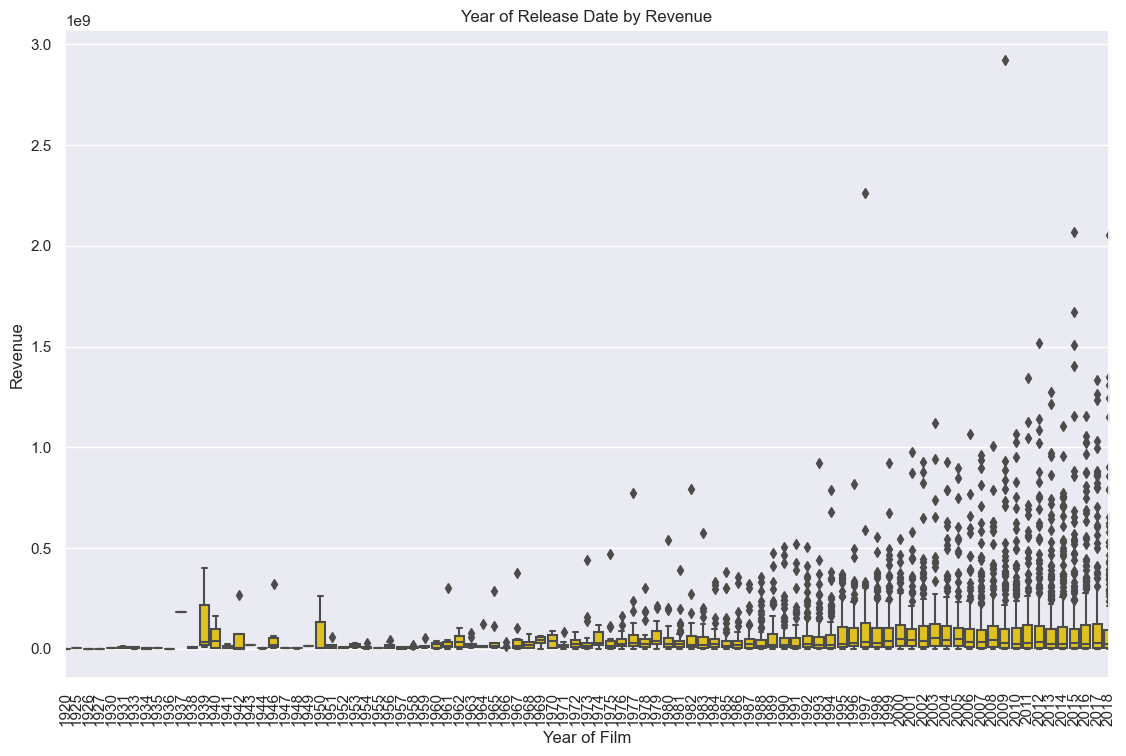

In [7730]:
# bivariate year of release with revenue data
fig, dx = plt.subplots()
sns.boxplot(x=train_date.dt.year, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(0, 90))
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

In [7731]:
# fill possible NA values with the statistical mode
train["release_date"] = train["release_date"].fillna(train["release_date"].mode()[0])
test["release_date"] = test["release_date"].fillna(train["release_date"].mode()[0])

train['temp'] = train.release_date.apply(lambda x: pd.to_datetime(x))
test['temp'] = test.release_date.apply(lambda x: pd.to_datetime(x))

train["month"] = train.temp.apply(lambda x: x.month)
test["month"] = test.temp.apply(lambda x: x.month)

train["year"] = train.temp.apply(lambda x: x.year)
test["year"] = test.temp.apply(lambda x: x.year)

train["day_of_week"] = train.temp.apply(lambda x: x.weekday()+1)
test["day_of_week"] = test.temp.apply(lambda x: x.weekday()+1)

train["week_of_year"] = train.temp.apply(lambda x: x.isocalendar()[1])
test["week_of_year"] = test.temp.apply(lambda x: x.isocalendar()[1])


train = train.drop(['temp'], axis=1)
test = test.drop(['temp'], axis=1)


train["day_of_week"] = train["day_of_week"].fillna(train["day_of_week"].mode()[0])
test["day_of_week"] = test["day_of_week"].fillna(train["day_of_week"].mode()[0])

train["year"] = train["year"].fillna(train["year"].mode()[0])
test["year"] = test["year"].fillna(train["year"].mode()[0])

train["month"] = train["month"].fillna(train["month"].mode()[0])
test["month"] = test["month"].fillna(train["month"].mode()[0])

train["week_of_year"] = train["week_of_year"].fillna(train["week_of_year"].mode()[0])
test["week_of_year"] = test["week_of_year"].fillna(train["week_of_year"].mode()[0])


train[["release_date", "month", "year", "day_of_week", "week_of_year"]].head()

,release_date,month,year,day_of_week,week_of_year
0,2/20/15,2,2015,5,8
1,8/6/04,8,2004,5,32
2,10/10/14,10,2014,5,41
3,3/9/12,3,2012,5,10
4,2/5/09,2,2009,4,6


In [7732]:
train.loc[train['year'].argmin(), ['title', 'year', 'revenue']]

title      The Cabinet of Dr. Caligari
year                              1920
revenue                           8811
Name: 5556, dtype: object

In [7733]:
# create feature by decade
train['1920s'] = train.year.map(lambda x: 1 if (x >= 1920 and x <= 1929) else 0)
test['1920s'] = test.year.map(lambda x: 1 if (x >= 1920 and x <= 1929) else 0)

train['1930s'] = train.year.map(lambda x: 1 if (x >= 1930 and x <= 1939) else 0)
test['1930s'] = test.year.map(lambda x: 1 if (x >= 1930 and x <= 1939) else 0)

train['1940s'] = train.year.map(lambda x: 1 if (x >= 1940 and x <= 1949) else 0)
test['1940s'] = test.year.map(lambda x: 1 if (x >= 1940 and x <= 1949) else 0)

train['1950s'] = train.year.map(lambda x: 1 if (x >= 1950 and x <= 1959) else 0)
test['1950s'] = test.year.map(lambda x: 1 if (x >= 1950 and x <= 1959) else 0)

train['1960s'] = train.year.map(lambda x: 1 if (x >= 1960 and x <= 1969) else 0)
test['1960s'] = test.year.map(lambda x: 1 if (x >= 1960 and x <= 1969) else 0)

train['1970s'] = train.year.map(lambda x: 1 if (x >= 1970 and x <= 1979) else 0)
test['1970s'] = test.year.map(lambda x: 1 if (x >= 1970 and x <= 1979) else 0)

train['1980s'] = train.year.map(lambda x: 1 if (x >= 1980 and x <= 1989) else 0)
test['1980s'] = test.year.map(lambda x: 1 if (x >= 1980 and x <= 1989) else 0)

train['1990s'] = train.year.map(lambda x: 1 if (x >= 1990 and x <= 1999) else 0)
test['1990s'] = test.year.map(lambda x: 1 if (x >= 1990 and x <= 1999) else 0)

train['2000s'] = train.year.map(lambda x: 1 if (x >= 2000 and x <= 2009) else 0)
test['2000s'] = test.year.map(lambda x: 1 if (x >= 2000 and x <= 2009) else 0)

train['2010s'] = train.year.map(lambda x: 1 if (x >= 2010 and x <= 2019) else 0)
test['2010s'] = test.year.map(lambda x: 1 if (x >= 2010 and x <= 2019) else 0)
train['day_of_week'].value_counts()


day_of_week
5    2963
4    1577
3    1413
2     432
6     410
1     273
7     224
Name: count, dtype: int64

In [7734]:
# create features by days of week
train['mondayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 1) else 0)
test['mondayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 1) else 0)

train['tuesdayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 2) else 0)
test['tuesdayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 2) else 0)

train['wednesdayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 3) else 0)
test['wednesdayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 3) else 0)

train['thursdayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 4) else 0)
test['thursdayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 4) else 0)

train['fridayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 5) else 0)
test['fridayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 5) else 0)

train['saturdayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 6) else 0)
test['saturdayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 6) else 0)

train['sundayRelease'] = train.day_of_week.map(lambda x: 1 if (x == 7) else 0)
test['sundayRelease'] = test.day_of_week.map(lambda x: 1 if (x == 7) else 0)

In [7735]:
# create features by season
train['Winter'] = train.month.map(lambda x: 1 if (x == 12 or x <= 2) else 0)
test['Winter'] = test.month.map(lambda x: 1 if (x == 12 or x <= 2) else 0)

train['Fall'] = train.month.map(lambda x: 1 if (x >= 9 and x <= 11) else 0)
test['Fall'] = test.month.map(lambda x: 1 if (x >= 9 and x <= 11) else 0)

train['Spring'] = train.month.map(lambda x: 1 if (x >= 3 and x <= 5) else 0)
test['Spring'] = test.month.map(lambda x: 1 if (x >= 3 and x <= 5) else 0)

train['Summer'] = train.month.map(lambda x: 1 if (x >= 6 and x <= 8) else 0)
test['Summer'] = test.month.map(lambda x: 1 if (x >= 6 and x <= 8) else 0)

In [7736]:
train_features.append('1960s')
train_features.append('1970s')
train_features.append('1980s')
train_features.append('1990s')
train_features.append('2000s')
train_features.append('2010s')
train_features.append('mondayRelease')
train_features.append('tuesdayRelease')
train_features.append('wednesdayRelease')
train_features.append('thursdayRelease')
train_features.append('fridayRelease')
train_features.append('saturdayRelease')
train_features.append('sundayRelease')
train_features.append('Winter')
train_features.append('Fall')
train_features.append('Spring')
train_features.append('Summer')


**Runtime**

In [7737]:
print('Movies missing a runtime:',train.runtime.isna().sum())


Movies missing a runtime: 0


In [7738]:
print('Movies with runtime < 10: ',(train.runtime < 10).sum())


Movies with runtime < 10:  13


In [7739]:
median = train.loc[train['runtime'] >= 10, 'runtime'].median()
train["runtime_processed"] = train["runtime"].mask(train["runtime"] < 10, median)
test["runtime_processed"] = test["runtime"].mask(test["runtime"] < 10, median)

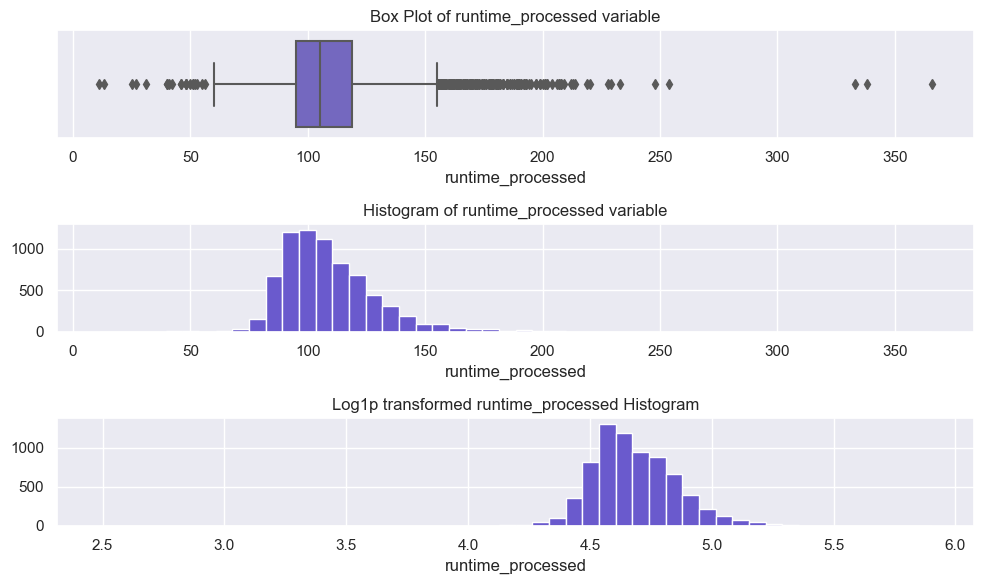

In [7740]:
plot_dist("runtime_processed", 'slateblue')

In [7741]:
# drop runtime > 300
train = train.drop(train[train['runtime_processed'] > 300].index)

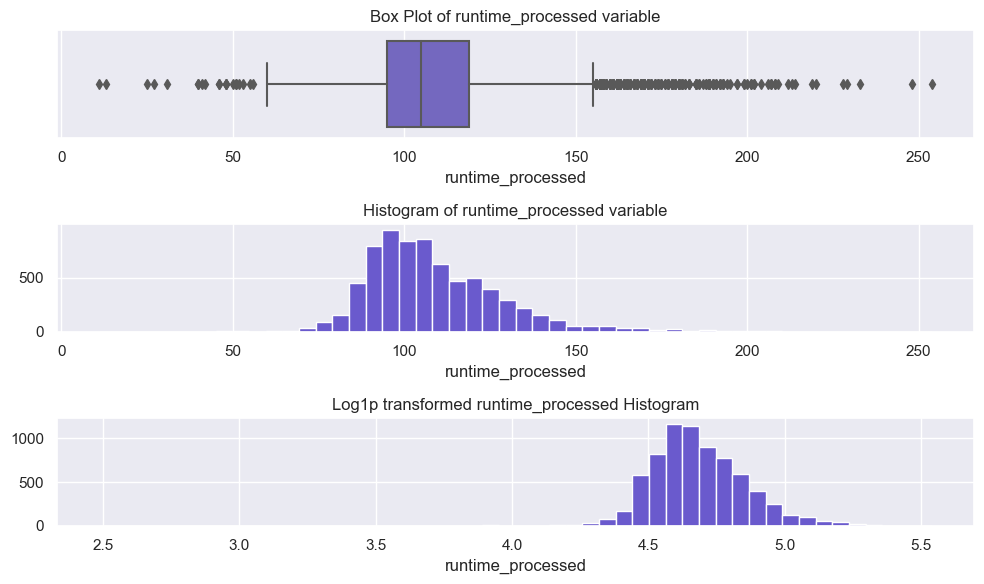

In [7742]:
plot_dist("runtime_processed", 'slateblue')

In [7743]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['runtime_processed'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['runtime_processed']), np.log1p(train['revenue']))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.234
Pearsons correlation: 0.232


In [7744]:
log_features.append('runtime_processed')

**Spoken Language**

In [7745]:
# new column for a count of the number of spoken languages
train.spoken_languages = train.spoken_languages.fillna("")
train['spoken_languages_reform'] = train['spoken_languages'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))
train['num_languages'] = train.spoken_languages_reform.apply(lambda x: len(x))
print(train['num_languages'])


test.spoken_languages = test.spoken_languages.fillna("")
test['spoken_languages_reform'] = test['spoken_languages'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))
test['num_languages'] = test.spoken_languages_reform.apply(lambda x: len(x))
print(test['num_languages'])

0       1
1       1
2       1
3       2
4       1
       ..
7287    1
7288    1
7289    1
7290    3
7291    1
Name: num_languages, Length: 7289, dtype: int64
0       2
1       1
2       1
3       3
4       1
       ..
4393    5
4394    1
4395    1
4396    1
4397    1
Name: num_languages, Length: 4398, dtype: int64


<Axes: >

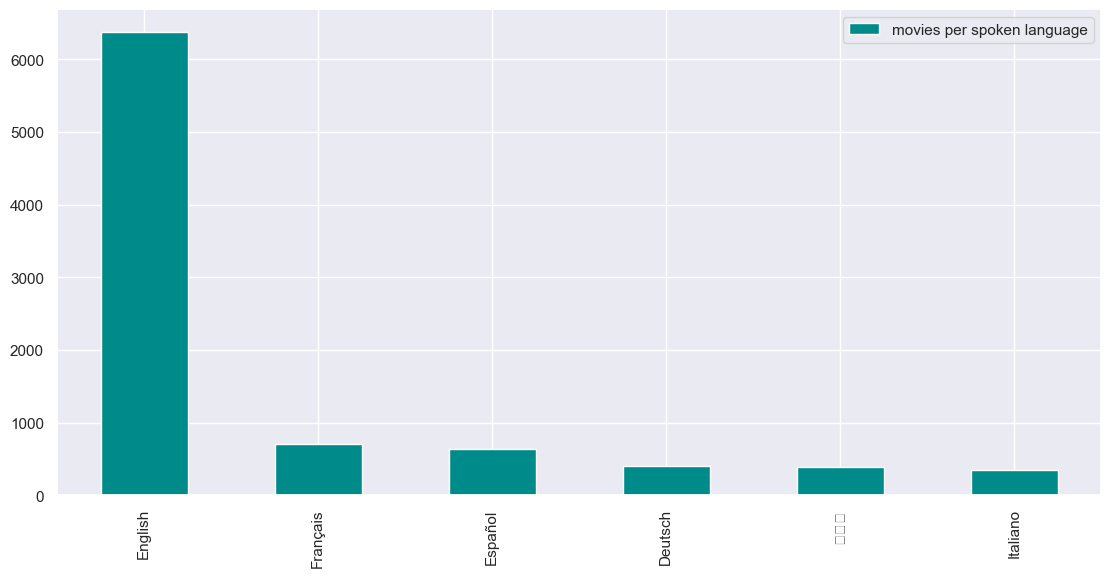

In [7746]:
# univariate analysis of spoken languages
languagesDict = {}
for element in train["spoken_languages_reform"].values:
    for name in element:
        if name not in languagesDict:
            languagesDict[name] = 1
        else:
            languagesDict[name] += 1
            
sns.set(rc={'figure.figsize':(12,6)})
            
languages_train = pd.DataFrame.from_dict(languagesDict, orient='index', columns=["movies per spoken language"])
languages_train.sort_values(by="movies per spoken language", ascending=False).head(6).plot.bar(color='darkcyan')


In [7747]:
# released in english
train['spoken_english'] = train.spoken_languages_reform.apply(lambda x: 1 if 'English' in x else 0)
test['spoken_english'] = test.spoken_languages_reform.apply(lambda x: 1 if 'English' in x else 0)


In [7748]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['spoken_english'], train['revenue'])
print('Pearsons correlation between released_in_english and revenue: %.3f' % corr)
corr, _ = pearsonr(train['spoken_english'], np.log1p(train['revenue']))
print('Pearsons correlation between released_in_english and log transformed  revenue: %.3f' % corr)

Pearsons correlation between released_in_english and revenue: 0.122
Pearsons correlation between released_in_english and log transformed  revenue: 0.183


In [7749]:
# analysis of correlation and create log feature
corr, _ = pearsonr(train['num_languages'], train['revenue'])
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_languages']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed num_languages and log transformed revenue: %.3f' % corr)


Pearsons correlation between num_languages and revenue: 0.072
Pearsons correlation between log transformed num_languages and log transformed revenue: 0.096


In [7750]:
# add log feature
train_features.append('spoken_english')
log_features.append('num_languages')

**Status**

In [7751]:
cols_to_drop.append('status')

**Tagline**

In [7752]:
train['has_tagline'] = train.tagline.apply(lambda x: 1 if type(x) == str else 0)
test['has_tagline'] = test.tagline.apply(lambda x: 1 if type(x) == str else 0)
train['has_tagline'].value_counts()

has_tagline
1    6239
0    1050
Name: count, dtype: int64

In [7753]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['has_tagline'], train['revenue'])
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)
corr, _ = pearsonr(train['has_tagline'], np.log1p(train['revenue']))
print('Pearsons correlation between has_tagline and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_tagline and revenue: 0.135
Pearsons correlation between has_tagline and log transformed revenue: 0.270


In [7754]:
# add feature
train_features.append('has_tagline')

**Title**

In [7755]:
# drop columns
cols_to_drop.append('title')

**Keyword**

In [7756]:
train['has_keywords'] = train.Keywords.apply(lambda x: 1 if type(x) == str else 0)
test['has_keywords'] = test.Keywords.apply(lambda x: 1 if type(x) == str else 0)

In [7757]:
train['has_keywords'].value_counts()

has_keywords
0    4567
1    2722
Name: count, dtype: int64

In [7758]:
# analysis of correlation and create log feature
corr, _ = pearsonr(train['has_keywords'], train['revenue'])
print('Pearsons correlation between has_keywords and revenue: %.3f' % corr)
corr, _ = pearsonr(train['has_keywords'], np.log1p(train['revenue']))
print('Pearsons correlation between has_keywords and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_keywords and revenue: -0.061
Pearsons correlation between has_keywords and log transformed revenue: -0.089


In [7759]:
train['Keywords'] = train['Keywords'].fillna('')
train['Keywords_reform'] = train['Keywords'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

test['Keywords'] = test['Keywords'].fillna('')
test['Keywords_reform'] = test['Keywords'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

In [7760]:
# number of keywords
train['num_keywords'] = train.Keywords_reform.apply(lambda x: len(x))
test['num_keywords'] = test.Keywords_reform.apply(lambda x: len(x))

train['num_keywords'].value_counts()

num_keywords
0      4567
5       292
4       253
3       226
6       225
2       208
1       190
7       189
8       160
9       137
10      130
11      124
12      100
13       89
14       58
15       57
16       56
17       45
18       32
21       25
20       23
19       19
22       17
23       14
27       12
24       12
25        5
26        5
28        2
37        2
32        2
31        2
30        2
29        2
33        1
39        1
40        1
38        1
149       1
43        1
97        1
Name: count, dtype: int64

<Axes: xlabel='num_keywords', ylabel='count'>

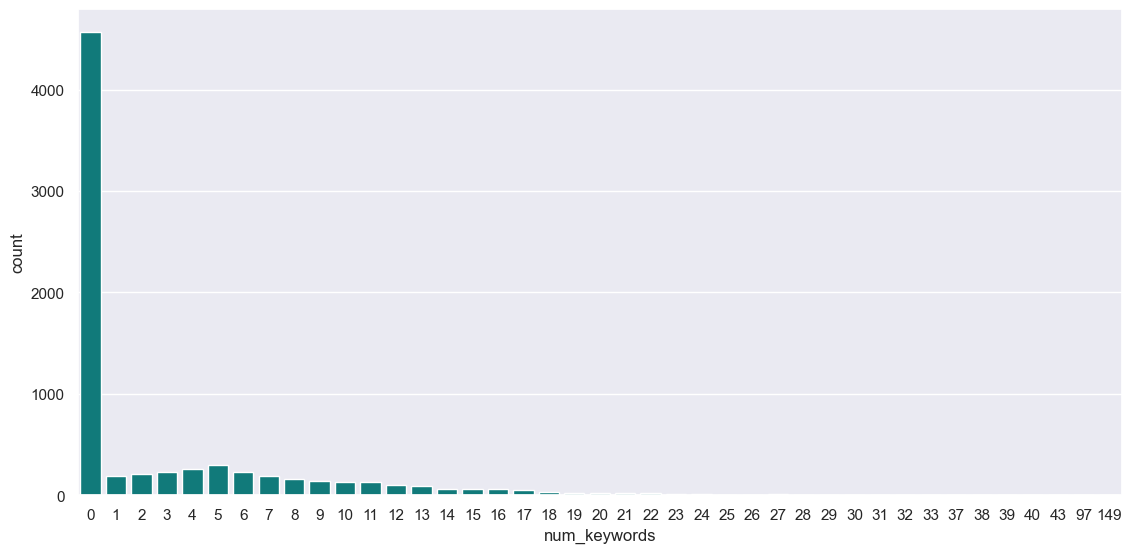

In [7761]:
# plot number of keywords
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x=train.num_keywords, color='darkcyan')


In [7762]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['num_keywords'], train['revenue'])
print('Pearsons correlation between num_keywords and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_keywords']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed num_keywords and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_keywords and revenue: 0.012
Pearsons correlation between log transformed num_keywords and log transformed revenue: -0.020


(7364, 1)

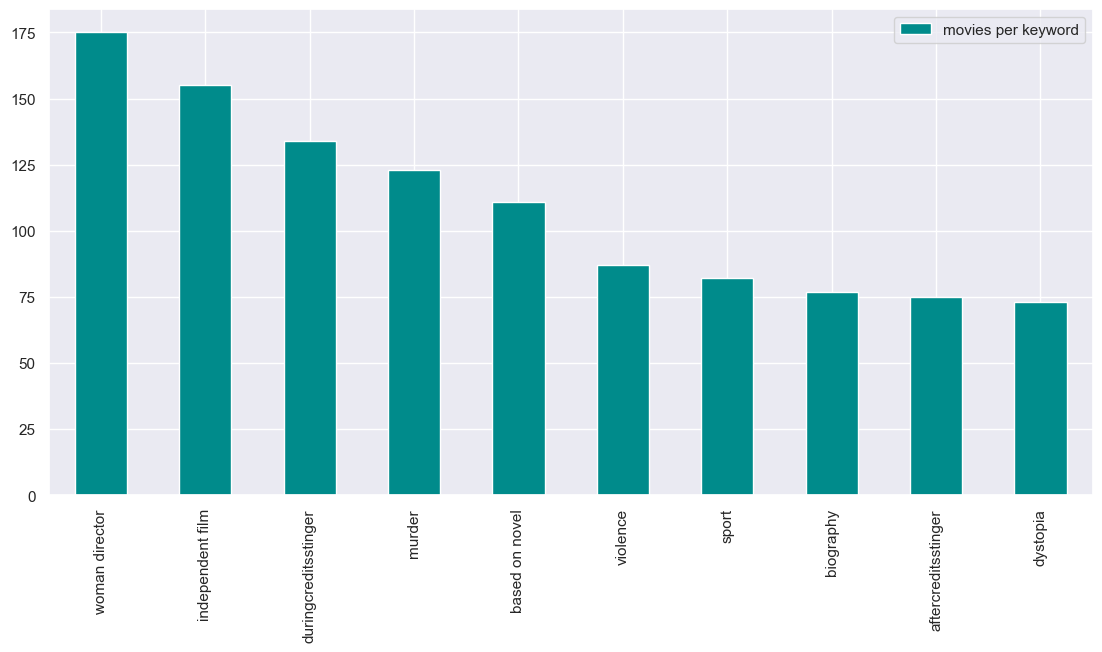

In [7763]:
# unique keywords
keywordsDict = {}
for element in train["Keywords_reform"].values:
    for name in element:
        if name not in keywordsDict:
            keywordsDict[name] = 1
        else:
            keywordsDict[name] += 1

keywords_train = pd.DataFrame.from_dict(keywordsDict, orient='index', columns=["movies per keyword"])
keywords_train.sort_values(by="movies per keyword", ascending=False).head(10).plot.bar(color='darkcyan')
keywords_train.shape

(357, 1)

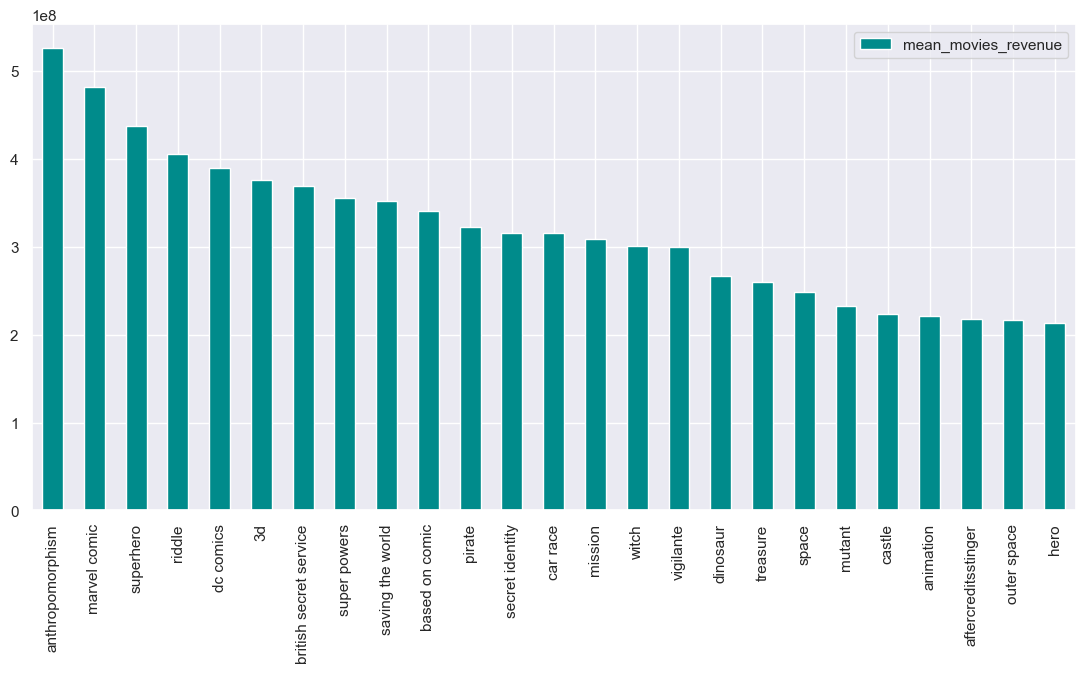

In [7764]:
# keywords by revenue
keywordsDict = {}
for element in train[["revenue", "Keywords_reform"]].values:
    for keyword in element[1]:
        if keyword not in keywordsDict:
            keywordsDict[keyword] = [element[0], 1]
        else:
            keywordsDict[keyword][0] += element[0]
            keywordsDict[keyword][1] += 1

keywordsDict = {k: v for k, v in keywordsDict.items() if v[1] >= 10}

for keyword in keywordsDict:
    keywordsDict[keyword][0] = keywordsDict[keyword][0]/keywordsDict[keyword][1]
    keywordsDict[keyword] = keywordsDict[keyword][0]

# keywords by revenue
keywords_train = pd.DataFrame.from_dict(keywordsDict, orient='index', columns=["mean_movies_revenue"])
keywords_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='darkcyan')
keywords_train.shape

In [7765]:

# checkKeywords
def checkKeywords(keyword):
    if len(keyword) < 1:
        return 0
    count = 0
    for word in keyword[:10]:
        if word in list(keywordsDict)[:100]:
            count += 1
    return count
# getKeywordRank
def getKeywordRank(keywords):
    if len(keywords) < 1:
        return 400
    rank = 0
    for k in keywords[:5]:
        if k in list(keywordsDict):
            rank += list(keywordsDict.keys()).index(k)
    if rank == 0:
        rank = 400
    return rank / len(keywords)


# create feature for number of keywords
train['numTopKeywords'] = train['Keywords_reform'].apply(lambda x: checkKeywords(x))
test['numTopKeywords'] = test['Keywords_reform'].apply(lambda x: checkKeywords(x))

# create feature for keyword rank
train['keywordRank'] = train['Keywords_reform'].apply(lambda x: getKeywordRank(x))
test['keywordRank'] = test['Keywords_reform'].apply(lambda x: getKeywordRank(x))



In [7766]:
train['numTopKeywords'].value_counts()
train['keywordRank'].value_counts()

keywordRank
400.000000    4643
200.000000      73
133.333333      57
100.000000      32
80.000000       28
              ... 
4.500000         1
15.384615        1
18.625000        1
5.428571         1
65.714286        1
Name: count, Length: 1617, dtype: int64

In [7767]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['numTopKeywords'], train['revenue'])
print('Pearsons correlation between numTopKeywords and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopKeywords']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed numTopKeywords and log transformed revenue: %.3f' % corr)

# correlation analysis and create log feature
corr, _ = pearsonr(train['keywordRank'], train['revenue'])
print('Pearsons correlation between keywordRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['keywordRank']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed keywordRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between numTopKeywords and revenue: -0.030
Pearsons correlation between log transformed numTopKeywords and log transformed revenue: -0.060
Pearsons correlation between keywordRank and revenue: 0.048
Pearsons correlation between log transformed keywordRank and log transformed revenue: 0.056


In [7768]:
# add feature
log_features.append('num_keywords')
log_features.append('numTopKeywords')
log_features.append('keywordRank')

**Cast**

In [7769]:
print('Movies missing a cast:',train.cast.isna().sum())


Movies missing a cast: 13


In [7770]:
# print number of NaN cast_num
print('Movies missing a cast_num:',train.cast_num.isna().sum())


Movies missing a cast_num: 2997


In [7771]:
#pre-processing
train.cast = train.cast.fillna("")
train['cast_processed'] = train['cast'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))
test.cast = test.cast.fillna("")
test['cast_processed'] = test['cast'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

In [7772]:
# calculate number of cast only for rows with cast_num is NaN
train['cast_num'] = train.apply(lambda row: len(row['cast_processed']) if np.isnan(row['cast_num']) else row['cast_num'], axis=1)
test['cast_num'] = test['cast_processed'].apply(lambda x: len(x))
train['cast_num'].value_counts()

cast_num
15.0     289
16.0     242
17.0     221
14.0     220
19.0     212
        ... 
121.0      1
135.0      1
125.0      1
141.0      1
176.0      1
Name: count, Length: 168, dtype: int64

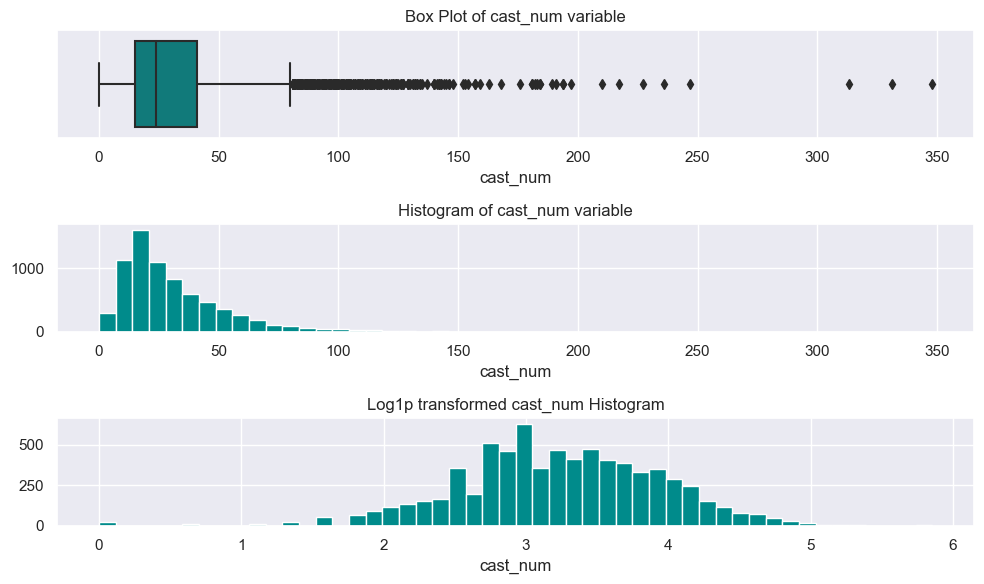

In [7773]:
# plot distribution of cast
plot_dist("cast_num", 'darkcyan')

<Axes: >

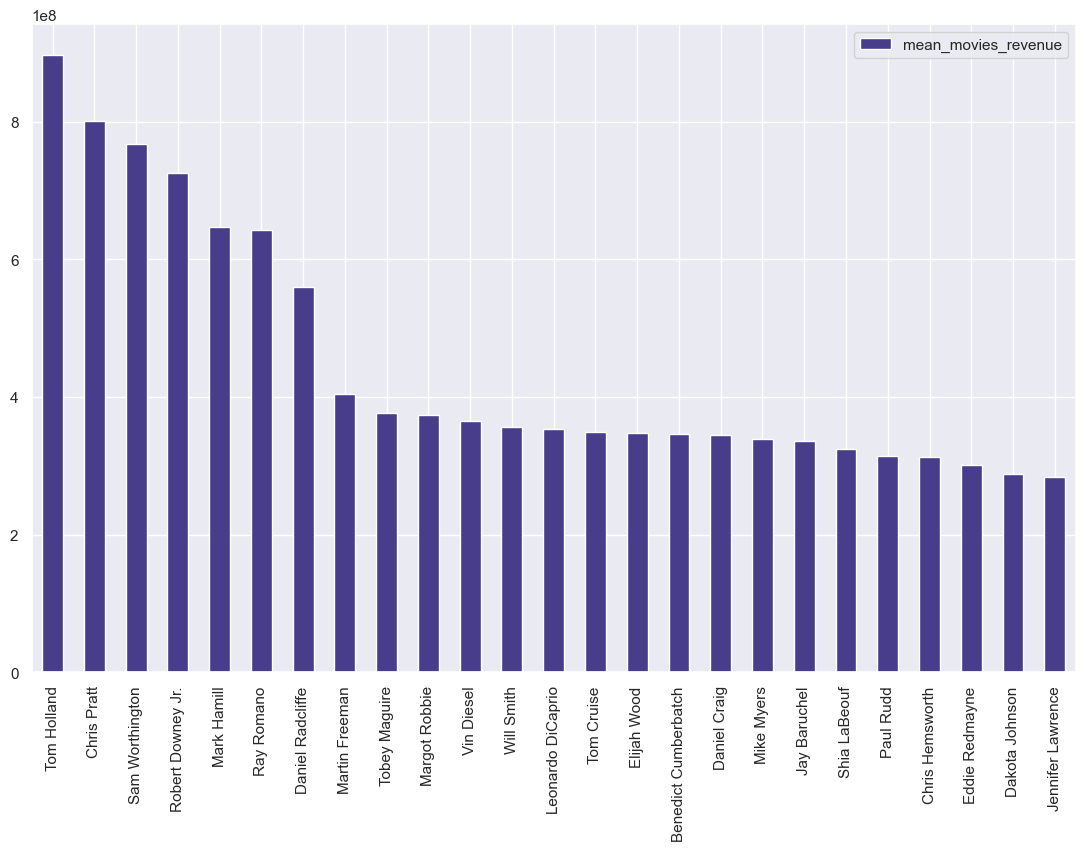

In [7774]:
leadActorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadActorsDict:
            leadActorsDict[element[1][i]] = [element[0], 1]
        else:
            leadActorsDict[element[1][i]][0] += element[0]
            leadActorsDict[element[1][i]][1] += 1 

leadActorsDict = {k: v for k, v in leadActorsDict.items() if v[1] >= 5}

for actor in leadActorsDict:
    leadActorsDict[actor][0] = leadActorsDict[actor][0]/leadActorsDict[actor][1]
    leadActorsDict[actor] = leadActorsDict[actor][0]


    
    
actors_train = pd.DataFrame.from_dict(leadActorsDict, orient='index', columns=["mean_movies_revenue"])
actors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='darkslateblue')

In [7775]:
# Sort both of our dicts of actors and lead actors to more easily access the 'top actors'
leadActorsDict = {k: v for k, v in sorted(leadActorsDict.items(), key=lambda item: item[1], reverse = True)}
actorsDict = {k: v for k, v in sorted(actorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top actor'
def checkLeadActor(cast):
    if len(cast) < 1 or cast[0] not in list(leadActorsDict)[:50]:
        return 0
    else:
        return 1

def checkTopActors(cast):
    if len(cast) < 1:
        return 0
    count = 0
    for actor in cast[:10]:
        if actor in list(actorsDict)[:100]:
            count += 1
    return count

def getActorRanks(cast):
    if len(cast) < 1:
        return len(actorsDict)
    rank = 0
    for a in cast[:5]:
        if a in list(actorsDict):
            rank += list(actorsDict.keys()).index(a)
    if rank == 0:
        rank = len(actorsDict)
    return rank / len(cast)

def getTopActorRank(cast):
    if len(cast) < 1:
        return len(leadActorsDict)
    if cast[0] in list(leadActorsDict):
        rank = list(leadActorsDict.keys()).index(cast[0])
    else:
        rank = len(leadActorsDict)
    return rank

#Creating a feature for top LEAD actors
train['topLeadActor'] = train['cast_processed'].apply(lambda x: checkLeadActor(x))
test['topLeadActor'] = test['cast_processed'].apply(lambda x: checkLeadActor(x))
#Creating feature for number of top actors
train['numTopActors'] = train['cast_processed'].apply(lambda x: checkTopActors(x))
test['numTopActors'] = test['cast_processed'].apply(lambda x: checkTopActors(x))


train['actorRanks'] = train['cast_processed'].apply(lambda x: getActorRanks(x))
test['actorRanks'] = test['cast_processed'].apply(lambda x: getActorRanks(x))

train['topActorRank'] = train['cast_processed'].apply(lambda x: getTopActorRank(x))
test['topActorRank'] = test['cast_processed'].apply(lambda x: getTopActorRank(x))

print(train['topLeadActor'].value_counts())
print()
print(train['numTopActors'].value_counts())
print()
print(train['actorRanks'].value_counts())
print()
print(train['topActorRank'].value_counts())

topLeadActor
0    6656
1     633
Name: count, dtype: int64

numTopActors
0    6421
1     735
2      83
3      28
4      10
5       5
6       4
7       3
Name: count, dtype: int64

actorRanks
116.000000    76
193.333333    63
124.285714    62
158.181818    59
108.750000    59
              ..
56.642857      1
162.533333     1
213.833333     1
153.444444     1
82.117647      1
Name: count, Length: 5360, dtype: int64

topActorRank
337    3794
157      51
102      40
32       38
196      37
       ... 
73        5
262       5
320       5
117       5
58        5
Name: count, Length: 338, dtype: int64


In [7776]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['cast_num'], train['revenue'])
print('Pearsons correlation between cast_num and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['cast_num']), np.log1p(train['revenue']))
print('Pearsons correlation between log transformed cast_num and  log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['topLeadActor'], train['revenue'])
print('Pearsons correlation between topLeadActor and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadActor'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadActor and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopActors'], train['revenue'])
print('Pearsons correlation between numTopActors and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopActors']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopActors and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['actorRanks'], train['revenue'])
print('Pearsons correlation between actorRanks and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['actorRanks']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed actorRanks and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['topActorRank'], train['revenue'])
print('Pearsons correlation between topActorRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['topActorRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed topActorRank and log transformed revenue: %.3f' % corr)

Pearsons correlation between cast_num and revenue: 0.323
Pearsons correlation between log transformed cast_num and  log transformed revenue: 0.399

Pearsons correlation between topLeadActor and revenue: 0.405
Pearsons correlation between topLeadActor and log transformed revenue: 0.232

Pearsons correlation between numTopActors and revenue: 0.400
Pearsons correlation between log transformed numTopActors and log transformed revenue: 0.189

Pearsons correlation between actorRanks and revenue: -0.128
Pearsons correlation between log transformed actorRanks and log transformed revenue: -0.271

Pearsons correlation between topActorRank and revenue: -0.375
Pearsons correlation between log transformed topActorRank and log transformed revenue: -0.354


In [7777]:
log_features.append('cast_num')
train_features.append('topLeadActor')
log_features.append('numTopActors')
log_features.append('actorRanks')
log_features.append('topActorRank')

**Crew**

In [7778]:
# pre-processing
train.crew = train.crew.fillna("")
test.crew = test.crew.fillna("")
train['crew_processed'] = train['crew'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))
test['crew_processed'] = test['crew'].apply(lambda x: re.findall("'name':\s*\'(.+?)\'", x))

In [7779]:
train['crew_processed'].value_counts()

crew_processed
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

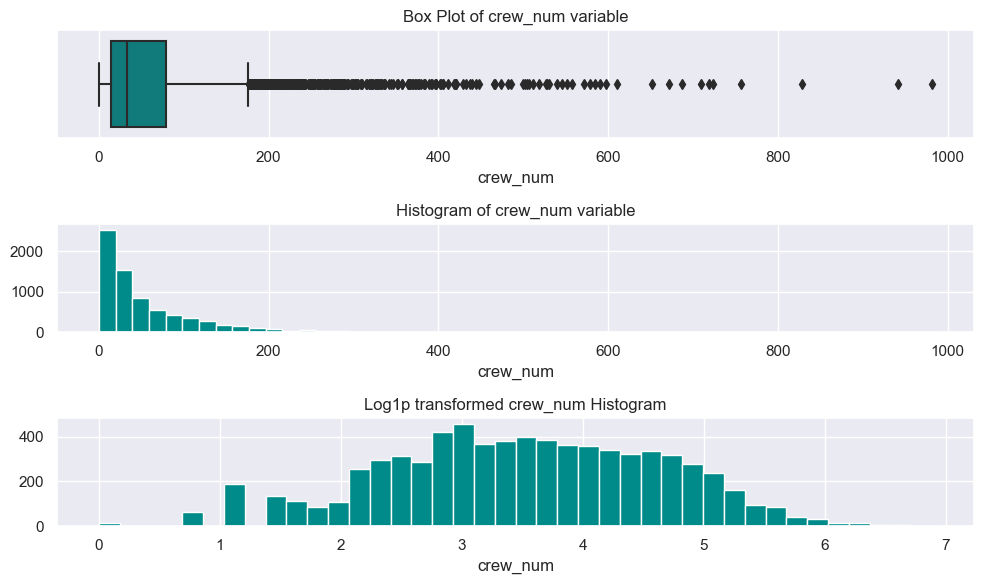

In [7780]:
# calculate number of cast only for rows with crew_num is NaN
train['crew_num'] = train.apply(lambda row: len(row['crew_processed']) if np.isnan(row['crew_num']) else row['crew_num'], axis=1)
test['crew_num'] = test['crew_processed'].apply(lambda x: len(x))
plot_dist("crew_num", 'darkcyan')

In [7781]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['crew_num'], train['revenue'])
print('Pearsons correlation between crew_num and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['crew_num']), np.log1p(train['revenue']))
print('Pearsons correlation between log1p crew_num and revenue: %.3f' % corr)

Pearsons correlation between crew_num and revenue: 0.446
Pearsons correlation between log1p crew_num and revenue: 0.406


In [7782]:
# add feature
log_features.append('crew_num')

**Directors**

In [7783]:
# bivariate directors
train['directors'] = train['crew'].apply(lambda x: re.findall("Director',\s*'name':\s*\'(.+?)\'", x))
test['directors'] = test['crew'].apply(lambda x: re.findall("Director',\s*'name':\s*\'(.+?)\'", x))

In [7784]:
train["directors"].value_counts()

directors
[Clint Eastwood]            30
[Steven Spielberg]          23
[]                          19
[Ridley Scott]              18
[Steven Soderbergh]         18
                            ..
[Kevin Tenney]               1
[Doug Lefler]                1
[Ann Hui]                    1
[Jessica Oreck]              1
[Troy Quane, Nick Bruno]     1
Name: count, Length: 3970, dtype: int64

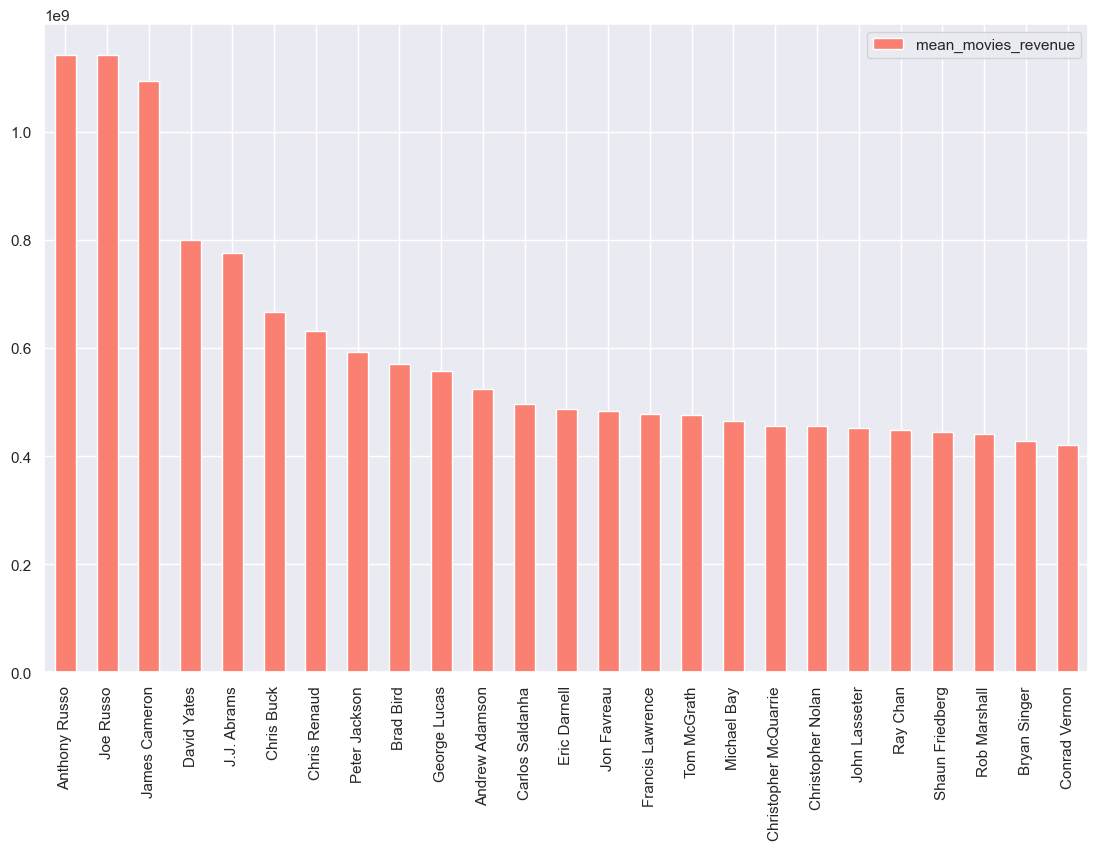

In [7785]:
directorsDict = {}
for element in train[["revenue", "directors"]].values:

    for director in element[1]:
        if director not in directorsDict:
            directorsDict[director] = [element[0], 1]
        else:
            directorsDict[director][0] += element[0]
            directorsDict[director][1] += 1

directorsDict = {k: v for k, v in directorsDict.items() if v[1] >= 5}

for director in directorsDict:
    directorsDict[director][0] = directorsDict[director][0]/directorsDict[director][1]
    directorsDict[director] = directorsDict[director][0]

    
directors_train = pd.DataFrame.from_dict(directorsDict, orient='index', columns=["mean_movies_revenue"])
directors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

directors_train.columns = ["number_of_directors"]

<Axes: >

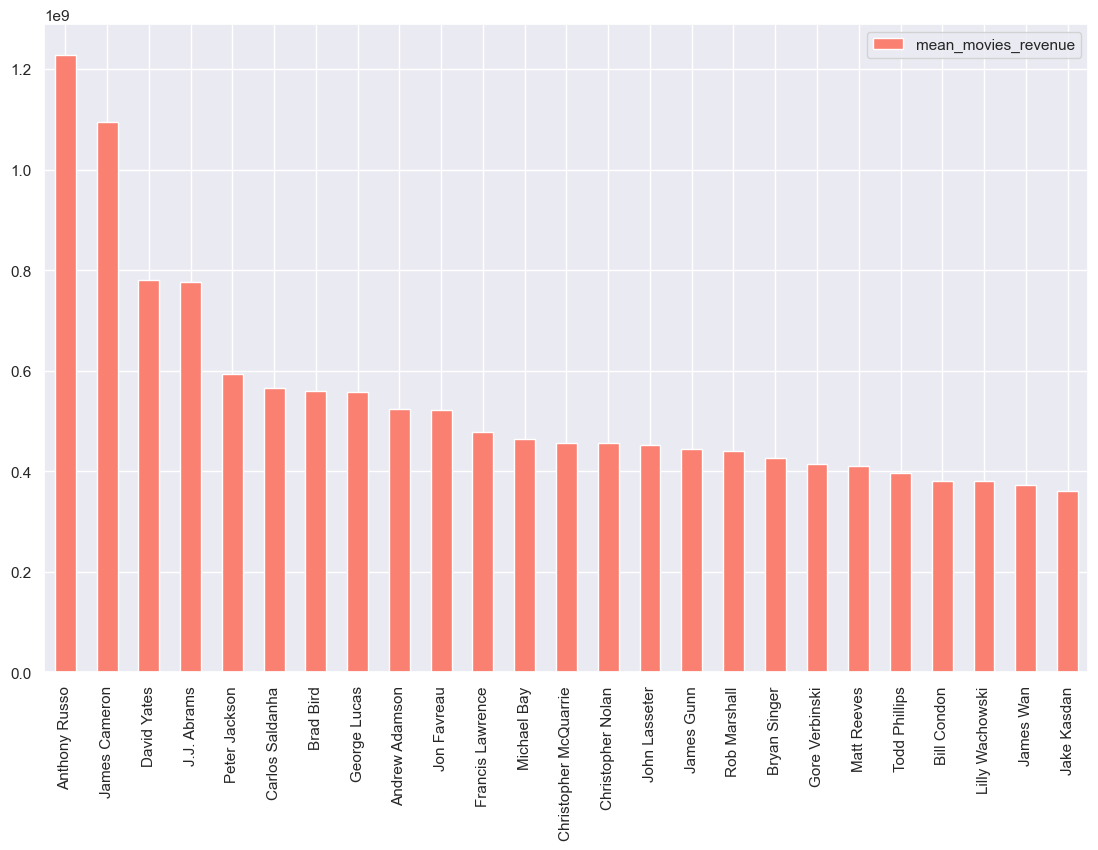

In [7786]:
leadDirectorsDict = {}
for element in train[["revenue", "directors"]].values:
   # compare results when looking at x top directors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadDirectorsDict:
            leadDirectorsDict[element[1][i]] = [element[0], 1]
        else:
            leadDirectorsDict[element[1][i]][0] += element[0]
            leadDirectorsDict[element[1][i]][1] += 1    

leadDirectorsDict = {k: v for k, v in leadDirectorsDict.items() if v[1] >= 5}

for director in leadDirectorsDict:
    leadDirectorsDict[director][0] = leadDirectorsDict[director][0]/leadDirectorsDict[director][1]
    leadDirectorsDict[director] = leadDirectorsDict[director][0]


    
    
directors_train = pd.DataFrame.from_dict(leadDirectorsDict, orient='index', columns=["mean_movies_revenue"])
directors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7787]:
# Sort both of our dicts
leadDirectorsDict = {k: v for k, v in sorted(leadDirectorsDict.items(), key=lambda item: item[1], reverse = True)}
directorsDict = {k: v for k, v in sorted(directorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top director'
def checkLeadDirector(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorsDict)[:25]:
        return 0
    else:
        return 1

def checkTopDirectors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(directorsDict)[:100]:
            count += 1
    return count

def getDirectorRank(crew):
    if len(crew) < 1:
        return len(directorsDict)
    rank = 0
    for c in crew[:5]:
        if c in list(directorsDict):
            rank += list(directorsDict.keys()).index(c)
    if rank == 0:
        rank = len(directorsDict)
    return rank / len(crew)

#Creating a feature for top LEAD directors
train['topLeadDirector'] = train['directors'].apply(lambda x: checkLeadDirector(x))
test['topLeadDirector'] = test['directors'].apply(lambda x: checkLeadDirector(x))

#Creating feature for number of top directors
train['numTopDirectors'] = train['directors'].apply(lambda x: checkTopDirectors(x))
test['numTopDirectors'] = test['directors'].apply(lambda x: checkTopDirectors(x))

train['directorsRank'] = train['directors'].apply(lambda x: getDirectorRank(x))
test['directorsRank'] = test['directors'].apply(lambda x: getDirectorRank(x))


print(train['topLeadDirector'].value_counts())
print()
print(train['numTopDirectors'].value_counts())
print()
print(train['directorsRank'].value_counts())

topLeadDirector
0    7111
1     178
Name: count, dtype: int64

numTopDirectors
0    6501
1     755
2      30
3       3
Name: count, dtype: int64

directorsRank
379.000000    3907
189.500000     390
126.333333      97
94.750000       47
169.000000      30
              ... 
0.333333         1
19.500000        1
152.500000       1
15.666667        1
118.666667       1
Name: count, Length: 604, dtype: int64


In [7788]:
# analysis of correlation and create log feature
corr, _ = pearsonr(train['topLeadDirector'], train['revenue'])
print('Pearsons correlation between topLeadDirector and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadDirector'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadDirector and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopDirectors'], train['revenue'])
print('Pearsons correlation between numTopDirectors and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopDirectors']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopDirectors and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['directorsRank'], train['revenue'])
print('Pearsons correlation between directorsRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['directorsRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed directorsRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between topLeadDirector and revenue: 0.400
Pearsons correlation between topLeadDirector and log transformed revenue: 0.168

Pearsons correlation between numTopDirectors and revenue: 0.446
Pearsons correlation between log transformed numTopDirectors and log transformed revenue: 0.298

Pearsons correlation between directorsRank and revenue: -0.387
Pearsons correlation between log transformed directorsRank and log transformed revenue: -0.357


In [7789]:
# add feature
train_features.append('topLeadDirector')
log_features.append('numTopDirectors')
log_features.append('directorsRank')

In [7790]:
# bivariate executive producers
train['exec_producers'] = train['crew'].apply(lambda x: re.findall("Executive Producer',\s*'name':\s*\'(.+?)\'", x))
test['exec_producers'] = test['crew'].apply(lambda x: re.findall("Executive Producer',\s*'name':\s*\'(.+?)\'", x))
train["exec_producers"].value_counts()

exec_producers
[]                                                                                          2734
[John Lasseter]                                                                               16
[Bob Weinstein, Harvey Weinstein]                                                             15
[Gen Fukunaga]                                                                                11
[George Lucas]                                                                                10
                                                                                            ... 
[Zhu Weijie]                                                                                   1
[Miky Lee, Taylor Shung, Jerry Kyoungboum Ko, Christine D, Hosung Kang]                        1
[Ken Daurio, Cinco Paul, Audrey Geisel]                                                        1
[Zack Snyder, Walter Hamada, Richard Suckle, Deborah Snyder, Nik Korda, Chantal Nong Vo]       1
[Don Granger, V

<Axes: >

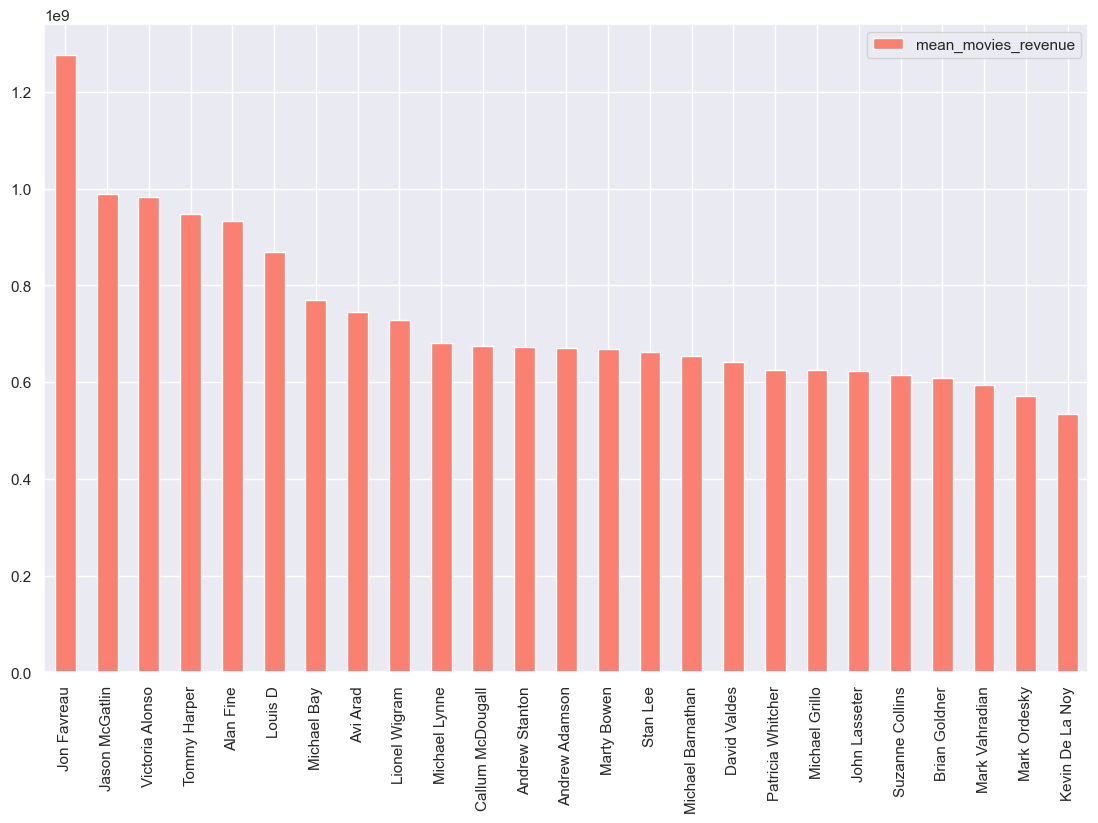

In [7791]:

exec_producersDict = {}
for element in train[["revenue", "exec_producers"]].values:

    for exec_producer in element[1]:
        if exec_producer not in exec_producersDict:
            exec_producersDict[exec_producer] = [element[0], 1]
        else:
            exec_producersDict[exec_producer][0] += element[0]
            exec_producersDict[exec_producer][1] += 1

exec_producersDict = {k: v for k, v in exec_producersDict.items() if v[1] >= 5}

for exec_producer in exec_producersDict:
    exec_producersDict[exec_producer][0] = exec_producersDict[exec_producer][0]/exec_producersDict[exec_producer][1]
    exec_producersDict[exec_producer] = exec_producersDict[exec_producer][0]




exec_producers_train = pd.DataFrame.from_dict(exec_producersDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

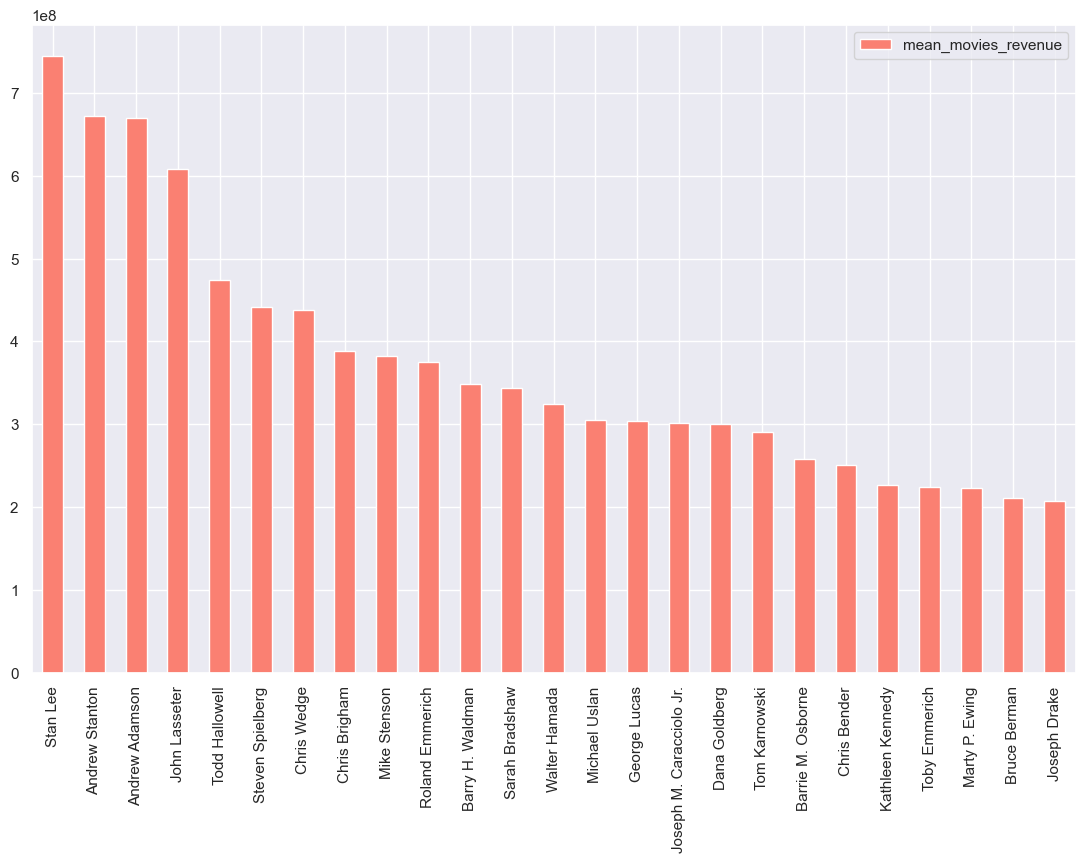

In [7792]:
leadExecProdDict = {}
for element in train[["revenue", "exec_producers"]].values:
   # compare results when looking at x top exec producers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadExecProdDict:
            leadExecProdDict[element[1][i]] = [element[0], 1]
        else:
            leadExecProdDict[element[1][i]][0] += element[0]
            leadExecProdDict[element[1][i]][1] += 1    

leadExecProdDict = {k: v for k, v in leadExecProdDict.items() if v[1] >= 5}

for exec_producer in leadExecProdDict:
    leadExecProdDict[exec_producer][0] = leadExecProdDict[exec_producer][0]/leadExecProdDict[exec_producer][1]
    leadExecProdDict[exec_producer] = leadExecProdDict[exec_producer][0]


    
    
exec_producers_train = pd.DataFrame.from_dict(leadExecProdDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7793]:
# Sort both of our dicts
leadExecProdDict = {k: v for k, v in sorted(leadExecProdDict.items(), key=lambda item: item[1], reverse = True)}
exec_producersDict = {k: v for k, v in sorted(exec_producersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top director'
def checkLeadExecProd(crew):
    if len(crew) < 1 or crew[0] not in list(leadExecProdDict)[:25]:
        return 0
    else:
        return 1

def checkTopExecProd(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(exec_producersDict)[:100]:
            count += 1
    return count

def getExecProdRank(crew):
    if len(crew) < 1:
        return len(exec_producersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(exec_producersDict):
            rank += list(exec_producersDict.keys()).index(c)
    if rank == 0:
        rank = len(exec_producersDict)
    return rank / len(crew)


#Creating a feature for top LEAD execprod
train['topLeadExecProd'] = train['exec_producers'].apply(lambda x: checkLeadExecProd(x))
test['topLeadExecProd'] = test['exec_producers'].apply(lambda x: checkLeadExecProd(x))

#Creating feature for number of top execprod
train['numTopExecProd'] = train['exec_producers'].apply(lambda x: checkTopExecProd(x))
test['numTopExecProd'] = test['exec_producers'].apply(lambda x: checkTopExecProd(x))

train['execProdRank'] = train['exec_producers'].apply(lambda x: getExecProdRank(x))
test['execProdRank'] = test['exec_producers'].apply(lambda x: getExecProdRank(x))


print(train['topLeadExecProd'].value_counts())
print()
print(train['numTopExecProd'].value_counts())
print()
print(train['execProdRank'].value_counts())

topLeadExecProd
0    6929
1     360
Name: count, dtype: int64

numTopExecProd
0    6675
1     390
2     140
3      43
4      29
5      12
Name: count, dtype: int64

execProdRank
606.000000    3650
303.000000     488
202.000000     209
151.500000     113
121.200000      52
              ... 
331.400000       1
263.000000       1
132.142857       1
51.750000        1
0.500000         1
Name: count, Length: 1546, dtype: int64


In [7794]:
# analysis of correlation and create log feature
corr, _ = pearsonr(train['topLeadExecProd'], train['revenue'])
print('Pearsons correlation between topLeadExecProd and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadExecProd'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadExecProd and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopExecProd'], train['revenue'])
print('Pearsons correlation between numTopExecProd and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopExecProd']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopExecProd and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['execProdRank'], train['revenue'])
print('Pearsons correlation between execProdRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['execProdRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed execProdRank and log transformed revenue: %.3f' % corr)

Pearsons correlation between topLeadExecProd and revenue: 0.373
Pearsons correlation between topLeadExecProd and log transformed revenue: 0.221

Pearsons correlation between numTopExecProd and revenue: 0.536
Pearsons correlation between log transformed numTopExecProd and log transformed revenue: 0.290

Pearsons correlation between execProdRank and revenue: -0.283
Pearsons correlation between log transformed execProdRank and log transformed revenue: -0.303


In [7795]:
# add feature
train_features.append('topLeadExecProd')
log_features.append('numTopExecProd')
log_features.append('execProdRank')


In [7796]:
# bivariate producers
train['producers'] = train['crew'].apply(lambda x: re.findall("Producer',\s*'name':\s*'(.+?)'", x))
test['producers'] = test['crew'].apply(lambda x: re.findall("Producer',\s*'name':\s*'(.+?)'", x))
train["producers"].value_counts()

producers
[]                                                                                        702
[Walt Disney]                                                                              15
[Gen Fukunaga]                                                                              9
[Alfred Hitchcock]                                                                          9
[Tomoyuki Tanaka]                                                                           7
                                                                                         ... 
[Betty E. Box]                                                                              1
[Theo Sena]                                                                                 1
[Mark Huffam, Robert Fox, Scott Rudin, Ian MacNeil, Mark Huffam]                            1
[Robert Greenhut]                                                                           1
[Bonnie Curtis, Julie Lynn, Dana Goldberg, Don Gra

<Axes: >

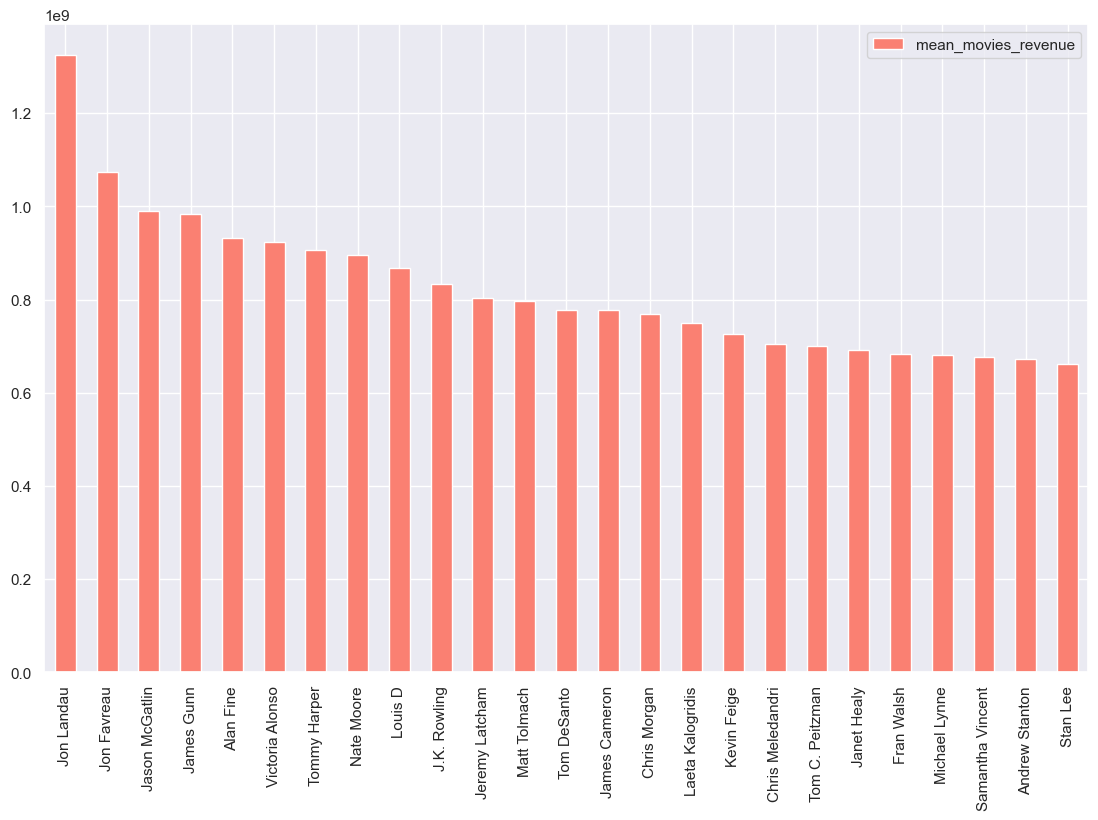

In [7797]:
producersDict = {}
for element in train[["revenue", "producers"]].values:

    for producer in element[1]:
        if producer not in producersDict:
            producersDict[producer] = [element[0], 1]
        else:
            producersDict[producer][0] += element[0]
            producersDict[producer][1] += 1

producersDict = {k: v for k, v in producersDict.items() if v[1] >= 5}

for producer in producersDict:
    producersDict[producer][0] = producersDict[producer][0]/producersDict[producer][1]
    producersDict[producer] = producersDict[producer][0]




producers_train = pd.DataFrame.from_dict(producersDict, orient='index', columns=["mean_movies_revenue"])
producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

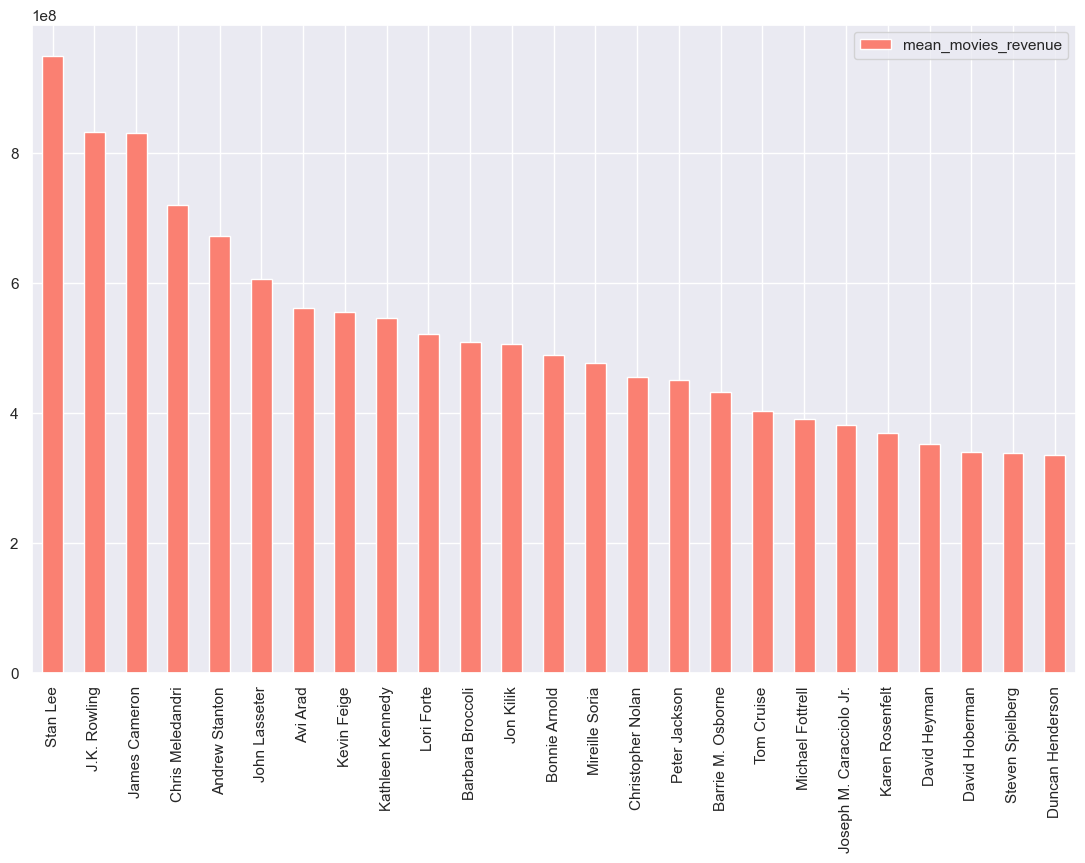

In [7798]:

leadProducerDict = {}
for element in train[["revenue", "producers"]].values:
   # compare results when looking at x top producers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadProducerDict:
            leadProducerDict[element[1][i]] = [element[0], 1]
        else:
            leadProducerDict[element[1][i]][0] += element[0]
            leadProducerDict[element[1][i]][1] += 1    

leadProducerDict = {k: v for k, v in leadProducerDict.items() if v[1] >= 5}

for producer in leadProducerDict:
    leadProducerDict[producer][0] = leadProducerDict[producer][0]/leadProducerDict[producer][1]
    leadProducerDict[producer] = leadProducerDict[producer][0]


    
    
producers_train = pd.DataFrame.from_dict(leadProducerDict, orient='index', columns=["mean_movies_revenue"])
producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7799]:
# Sort both of our dicts
leadProducerDict = {k: v for k, v in sorted(leadProducerDict.items(), key=lambda item: item[1], reverse = True)}
producersDict = {k: v for k, v in sorted(producersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top producer'
def checkLeadProducer(crew):
    if len(crew) < 1 or crew[0] not in list(leadProducerDict)[:25]:
        return 0
    else:
        return 1

def checkTopProducers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for producer in crew[:5]:
        if producer in list(producersDict)[:100]:
            count += 1
    return count


def getProducerRank(crew):
    if len(crew) < 1:
        return len(producersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(producersDict):
            rank += list(producersDict.keys()).index(c)
    if rank == 0:
        rank = len(producersDict)
    return rank / len(crew)



#Creating a feature for top LEAD Producers
train['topLeadProducer'] = train['producers'].apply(lambda x: checkLeadProducer(x))
test['topLeadProducer'] = test['producers'].apply(lambda x: checkLeadProducer(x))

#Creating feature for number of top Producers
train['numTopProducers'] = train['producers'].apply(lambda x: checkTopProducers(x))
test['numTopProducers'] = test['producers'].apply(lambda x: checkTopProducers(x))

train['producersRank'] = train['producers'].apply(lambda x: getProducerRank(x))
test['producersRank'] = test['producers'].apply(lambda x: getProducerRank(x))


print(train['topLeadProducer'].value_counts())
print()
print(train['numTopProducers'].value_counts())
print()
print(train['producersRank'].value_counts())

topLeadProducer
0    7017
1     272
Name: count, dtype: int64

numTopProducers
0    6744
1     328
2     126
3      48
4      28
5      15
Name: count, dtype: int64

producersRank
1601.000000    1098
800.500000      368
533.666667      272
400.250000      147
320.200000       87
               ... 
57.500000         1
638.666667        1
85.600000         1
100.785714        1
26.714286         1
Name: count, Length: 3865, dtype: int64


In [7800]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['topLeadProducer'], train['revenue'])
print('Pearsons correlation between topLeadProducer and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadProducer'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadProducer and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopProducers'], train['revenue'])
print('Pearsons correlation between numTopProducers and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopProducers']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopProducers and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['producersRank'], train['revenue'])
print('Pearsons correlation between producersRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['producersRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed producersRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between topLeadProducer and revenue: 0.483
Pearsons correlation between topLeadProducer and log transformed revenue: 0.216

Pearsons correlation between numTopProducers and revenue: 0.632
Pearsons correlation between log transformed numTopProducers and log transformed revenue: 0.283

Pearsons correlation between producersRank and revenue: -0.288
Pearsons correlation between log transformed producersRank and log transformed revenue: -0.342


In [7801]:
# add feature
train_features.append('topLeadProducer')
log_features.append('numTopProducers')
log_features.append('producersRank')

In [7802]:
# bi-variate composers
train['composers'] = train['crew'].apply(lambda x: re.findall("Composer',\s*'name':\s*'(.+?)'", x))
test['composers'] = test['crew'].apply(lambda x: re.findall("Composer',\s*'name':\s*'(.+?)'", x))
train["composers"].value_counts()

composers
[]                                     5557
[Jerry Goldsmith]                        35
[James Newton Howard]                    33
[James Horner]                           32
[John Williams]                          20
                                       ... 
[Joe Kraemer]                             1
[James Bernard]                           1
[Steve Bartek, James Newton Howard]       1
[Benh Zeitlin, Dan Romer]                 1
[Jerry Amaldev]                           1
Name: count, Length: 775, dtype: int64

<Axes: >

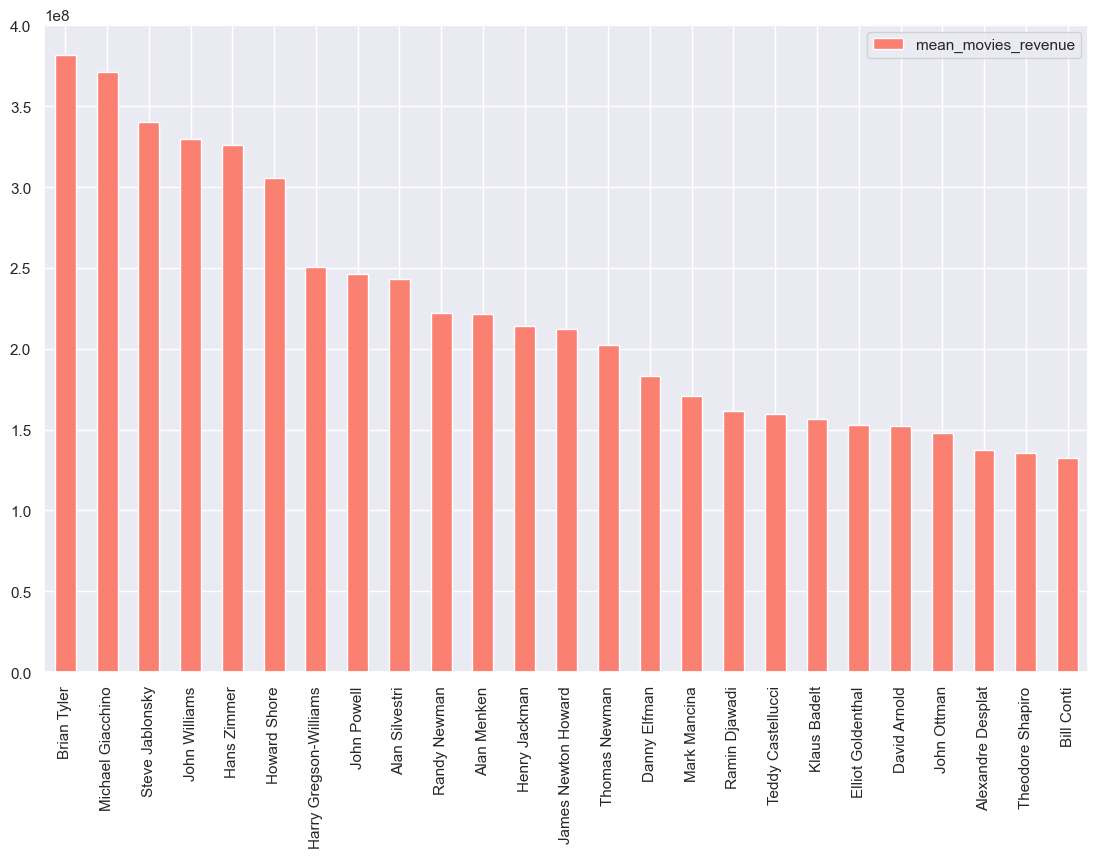

In [7803]:
composersDict = {}
for element in train[["revenue", "composers"]].values:

    for composer in element[1]:
        if composer not in composersDict:
            composersDict[composer] = [element[0], 1]
        else:
            composersDict[composer][0] += element[0]
            composersDict[composer][1] += 1

composersDict = {k: v for k, v in composersDict.items() if v[1] >= 5}

for composer in composersDict:
    composersDict[composer][0] = composersDict[composer][0]/composersDict[composer][1]
    composersDict[composer] = composersDict[composer][0]




composers_train = pd.DataFrame.from_dict(composersDict, orient='index', columns=["mean_movies_revenue"])
composers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

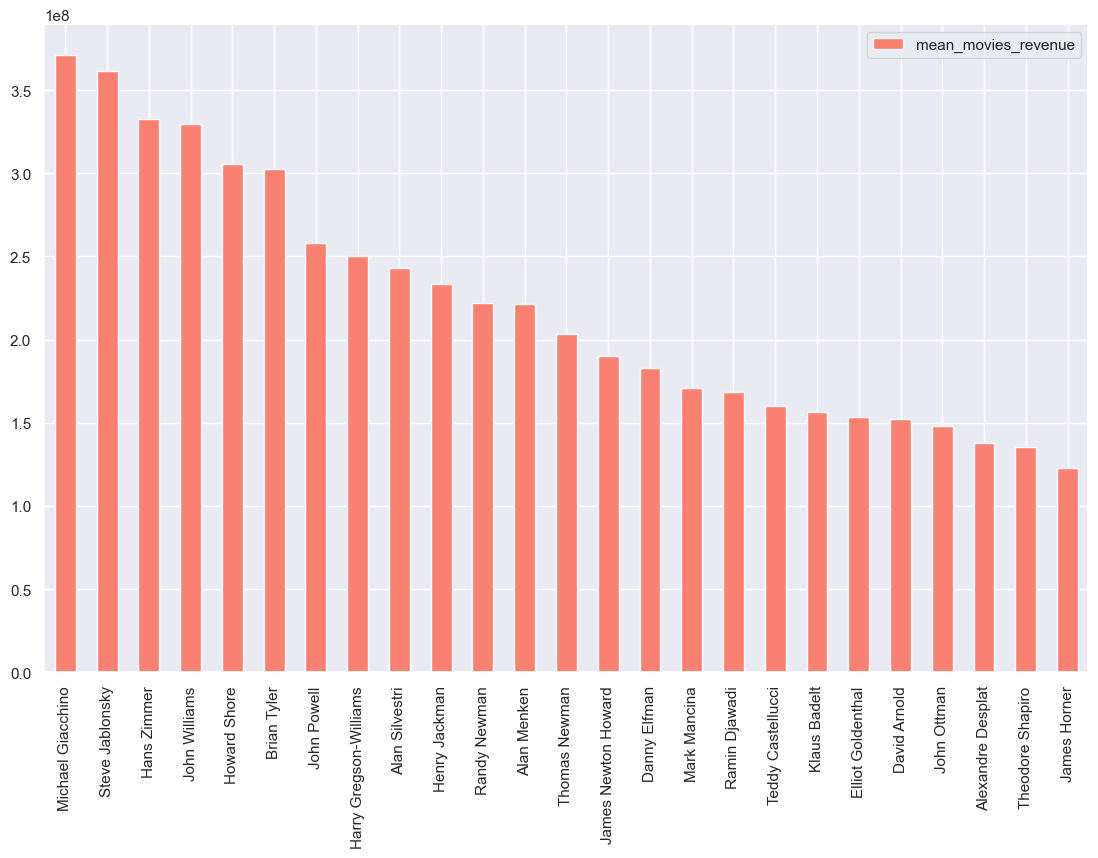

In [7804]:
leadComposerDict = {}
for element in train[["revenue", "composers"]].values:
   # compare results when looking at x top composers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadComposerDict:
            leadComposerDict[element[1][i]] = [element[0], 1]
        else:
            leadComposerDict[element[1][i]][0] += element[0]
            leadComposerDict[element[1][i]][1] += 1    

leadComposerDict = {k: v for k, v in leadComposerDict.items() if v[1] >= 5}

for composer in leadComposerDict:
    leadComposerDict[composer][0] = leadComposerDict[composer][0]/leadComposerDict[composer][1]
    leadComposerDict[composer] = leadComposerDict[composer][0]


    
    
composers_train = pd.DataFrame.from_dict(leadComposerDict, orient='index', columns=["mean_movies_revenue"])
composers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7805]:
# Sort both of our dicts
leadComposerDict = {k: v for k, v in sorted(leadComposerDict.items(), key=lambda item: item[1], reverse = True)}
composersDict = {k: v for k, v in sorted(composersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top Composer'
def checkLeadComposer(crew):
    if len(crew) < 1 or crew[0] not in list(leadComposerDict)[:25]:
        return 0
    else:
        return 1

def checkTopComposers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for composer in crew[:5]:
        if composer in list(composersDict)[:100]:
            count += 1
    return count

def getComposerRank(crew):
    if len(crew) < 1:
        return len(composersDict)
    rank = 0
    for c in crew[:5]:
        if c in list(composersDict):
            rank += list(composersDict.keys()).index(c)
    if rank == 0:
        rank = len(composersDict)
    return rank / len(crew)



#Creating a feature for top LEAD Composers
train['topLeadComposer'] = train['composers'].apply(lambda x: checkLeadComposer(x))
test['topLeadComposer'] = test['composers'].apply(lambda x: checkLeadComposer(x))

#Creating feature for number of top Composers
train['numTopComposers'] = train['composers'].apply(lambda x: checkTopComposers(x))
test['numTopComposers'] = test['composers'].apply(lambda x: checkTopComposers(x))

train['composersRank'] = train['composers'].apply(lambda x: getComposerRank(x))
test['composersRank'] = test['composers'].apply(lambda x: getComposerRank(x))

print(train['topLeadComposer'].value_counts())
print()
print(train['numTopComposers'].value_counts())
print()
print(train['composersRank'].value_counts())

topLeadComposer
0    6955
1     334
Name: count, dtype: int64

numTopComposers
0    6406
1     872
2      11
Name: count, dtype: int64

composersRank
81.000000    6320
40.500000      80
38.000000      36
12.000000      34
27.000000      33
             ... 
31.666667       1
32.500000       1
2.500000        1
27.500000       1
2.333333        1
Name: count, Length: 112, dtype: int64


In [7806]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['topLeadComposer'], train['revenue'])
print('Pearsons correlation between topLeadComposer and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadComposer'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadComposer and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopComposers'], train['revenue'])
print('Pearsons correlation between numTopComposers and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopComposers']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopComposers and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['composersRank'], train['revenue'])
print('Pearsons correlation between composersRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['composersRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed composersRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between topLeadComposer and revenue: 0.171
Pearsons correlation between topLeadComposer and log transformed revenue: 0.150

Pearsons correlation between numTopComposers and revenue: 0.096
Pearsons correlation between log transformed numTopComposers and log transformed revenue: 0.147

Pearsons correlation between composersRank and revenue: -0.134
Pearsons correlation between log transformed composersRank and log transformed revenue: -0.158


In [7807]:
# add feature
train_features.append('topLeadComposer')
log_features.append('numTopComposers')
log_features.append('composersRank')

In [7808]:
# bivariate directors of photography
train['director_photos'] = train['crew'].apply(lambda x: re.findall("Director of Photography',\s*'name':\s*'(.+?)'", x))
test['director_photos'] = test['crew'].apply(lambda x: re.findall("Director of Photography',\s*'name':\s*'(.+?)'", x))
train["director_photos"].value_counts()

director_photos
[]                                    1223
[Dean Semler]                           34
[Roger Deakins]                         33
[Robert Elswit]                         31
[Mark Irwin]                            30
                                      ... 
[Chuck Shuman]                           1
[Roland Totheroh, Ira H. Morgan]         1
[John Toon]                              1
[Darius Khondji, Conrad W. Hall]         1
[Michael Coulter, Karl von Moller]       1
Name: count, Length: 2005, dtype: int64

<Axes: >

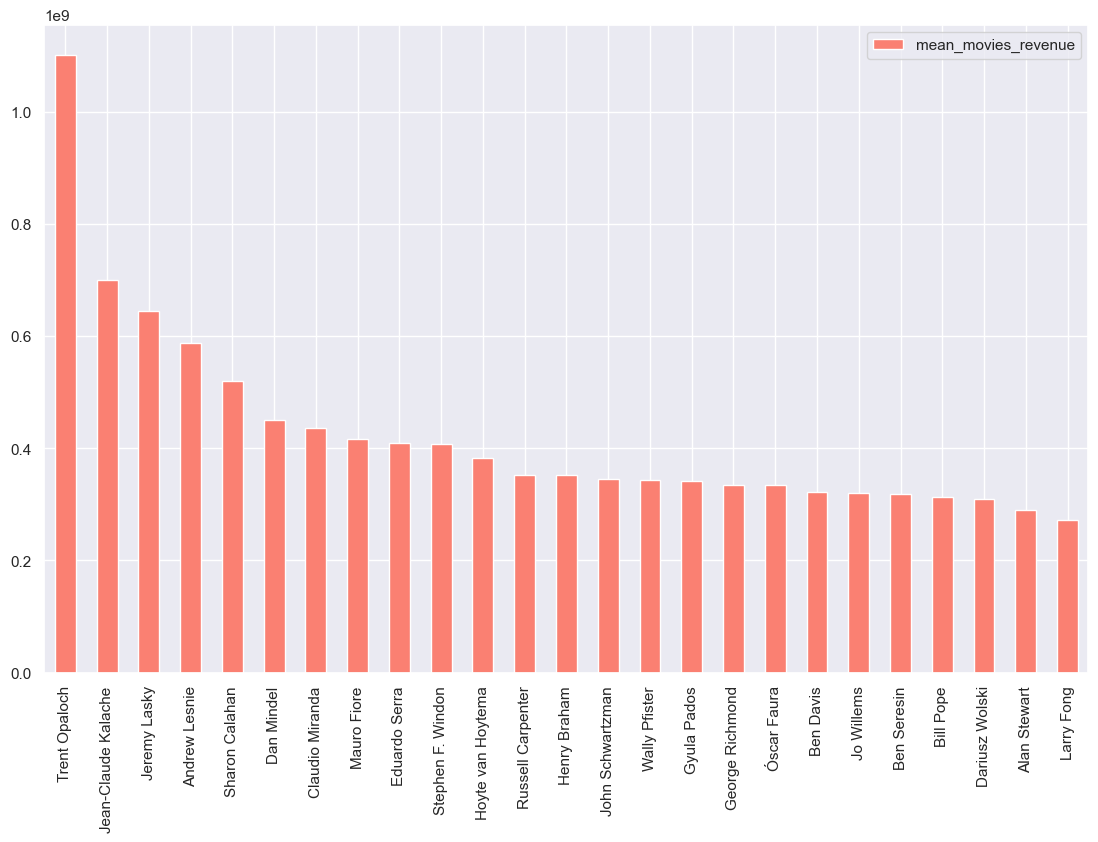

In [7809]:
director_photosDict = {}
for element in train[["revenue", "director_photos"]].values:

    for director_photo in element[1]:
        if director_photo not in director_photosDict:
            director_photosDict[director_photo] = [element[0], 1]
        else:
            director_photosDict[director_photo][0] += element[0]
            director_photosDict[director_photo][1] += 1

director_photosDict = {k: v for k, v in director_photosDict.items() if v[1] >= 5}

for director_photo in director_photosDict:
    director_photosDict[director_photo][0] = director_photosDict[director_photo][0]/director_photosDict[director_photo][1]
    director_photosDict[director_photo] = director_photosDict[director_photo][0]

director_photos_train = pd.DataFrame.from_dict(director_photosDict, orient='index', columns=["mean_movies_revenue"])
director_photos_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

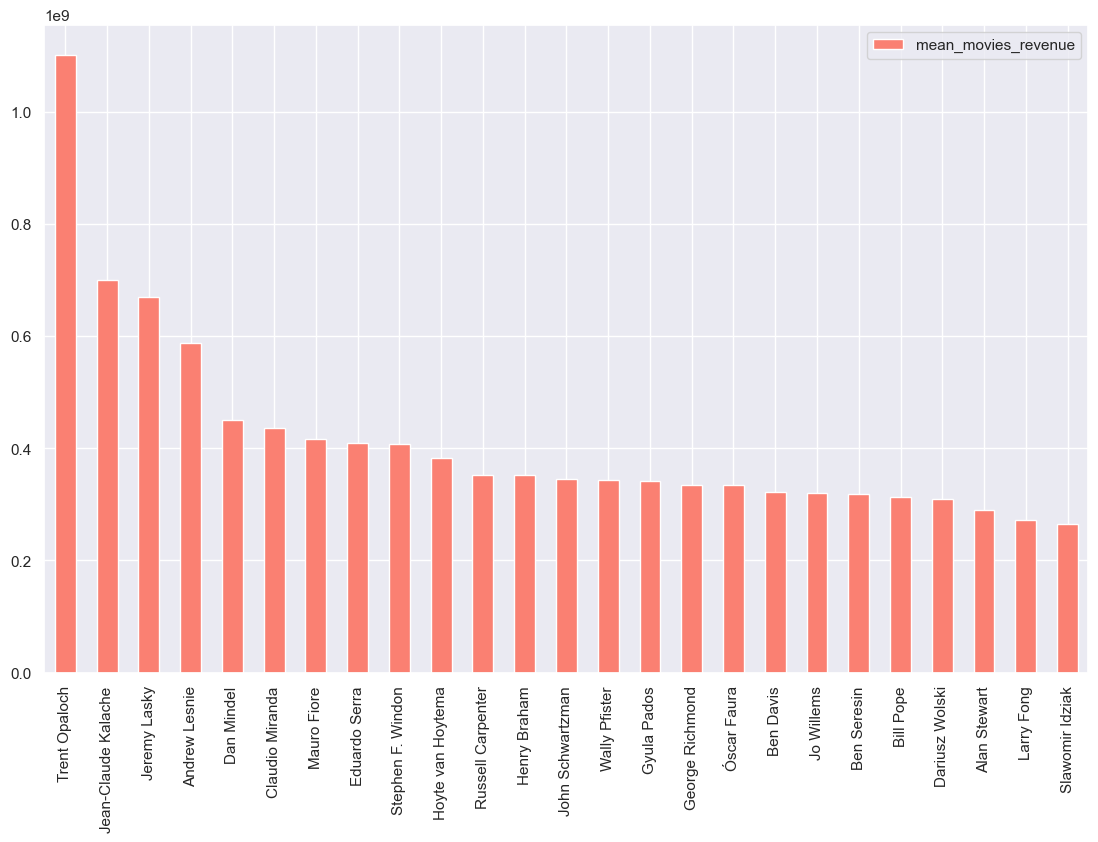

In [7810]:
leadDirectorPhotoDict = {}
for element in train[["revenue", "director_photos"]].values:
   # compare results when looking at x top director_photos in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadDirectorPhotoDict:
            leadDirectorPhotoDict[element[1][i]] = [element[0], 1]
        else:
            leadDirectorPhotoDict[element[1][i]][0] += element[0]
            leadDirectorPhotoDict[element[1][i]][1] += 1    

leadDirectorPhotoDict = {k: v for k, v in leadDirectorPhotoDict.items() if v[1] >= 5}

for director_photo in leadDirectorPhotoDict:
    leadDirectorPhotoDict[director_photo][0] = leadDirectorPhotoDict[director_photo][0]/leadDirectorPhotoDict[director_photo][1]
    leadDirectorPhotoDict[director_photo] = leadDirectorPhotoDict[director_photo][0]

director_photos_train = pd.DataFrame.from_dict(leadDirectorPhotoDict, orient='index', columns=["mean_movies_revenue"])
director_photos_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7811]:
# sort both of our dicts
leadDirectorPhotoDict = {k: v for k, v in sorted(leadDirectorPhotoDict.items(), key=lambda item: item[1], reverse = True)}
director_photosDict = {k: v for k, v in sorted(director_photosDict.items(), key=lambda item: item[1], reverse = True)}
# function to check if lead role is a 'top director'
def checkLeadDirectorPhoto(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorPhotoDict)[:25]:
        return 0
    else:
        return 1

def checkTopDirectorsPhotos(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(director_photosDict)[:100]:
            count += 1
    return count

def getDirectorsPhotosRank(crew):
    if len(crew) < 1:
        return len(director_photosDict)
    rank = 0
    for c in crew[:5]:
        if c in list(director_photosDict):
            rank += list(director_photosDict.keys()).index(c)
    if rank == 0:
        rank = len(director_photosDict)
    return rank / len(crew)


#Creating a feature for top LEAD director of photography
train['topLeadDirectorPhoto'] = train['director_photos'].apply(lambda x: checkLeadDirectorPhoto(x))
test['topLeadDirectorPhoto'] = test['director_photos'].apply(lambda x: checkLeadDirectorPhoto(x))

#Creating feature for number of top director of photography
train['numTopDirectorsPhoto'] = train['director_photos'].apply(lambda x: checkTopDirectorsPhotos(x))
test['numTopDirectorsPhoto'] = test['director_photos'].apply(lambda x: checkTopDirectorsPhotos(x))

train['directorsPhotoRank'] = train['director_photos'].apply(lambda x: getDirectorsPhotosRank(x))
test['directorsPhotoRank'] = test['director_photos'].apply(lambda x: getDirectorsPhotosRank(x))


print(train['topLeadDirectorPhoto'].value_counts())
print()
print(train['numTopDirectorsPhoto'].value_counts())
print()
print(train['directorsPhotoRank'].value_counts())

topLeadDirectorPhoto
0    7006
1     283
Name: count, dtype: int64

numTopDirectorsPhoto
0    5831
1    1447
2      11
Name: count, dtype: int64

directorsPhotoRank
363.00    3308
181.50     104
71.00       34
93.00       33
98.00       32
          ... 
169.50       1
83.50        1
87.50        1
86.25        1
43.50        1
Name: count, Length: 435, dtype: int64


In [7812]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['topLeadDirectorPhoto'], train['revenue'])
print('Pearsons correlation between topLeadDirectorPhoto and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadDirectorPhoto'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadDirectorPhoto and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopDirectorsPhoto'], train['revenue'])
print('Pearsons correlation between numTopDirectorsPhoto and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopDirectorsPhoto']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopDirectorsPhoto and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['directorsPhotoRank'], train['revenue'])
print('Pearsons correlation between directorsPhotoRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['directorsPhotoRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed directorsPhotoRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between topLeadDirectorPhoto and revenue: 0.347
Pearsons correlation between topLeadDirectorPhoto and log transformed revenue: 0.183

Pearsons correlation between numTopDirectorsPhoto and revenue: 0.369
Pearsons correlation between log transformed numTopDirectorsPhoto and log transformed revenue: 0.325

Pearsons correlation between directorsPhotoRank and revenue: -0.346
Pearsons correlation between log transformed directorsPhotoRank and log transformed revenue: -0.395


In [7813]:
# add feature
train_features.append('topLeadDirectorPhoto')
log_features.append('numTopDirectorsPhoto')
log_features.append('directorsPhotoRank')


In [7814]:
# bi-variate editors
train['editors'] = train['crew'].apply(lambda x: re.findall("Editor',\s*'name':\s*'(.+?)'", x))
test['editors'] = test['crew'].apply(lambda x: re.findall("Editor',\s*'name':\s*'(.+?)'", x))
train["editors"].value_counts()


editors
[]                                                                                      1013
[Michael Kahn]                                                                            28
[Conrad Buff IV]                                                                          19
[Paul Hirsch]                                                                             16
[Joel Cox]                                                                                16
                                                                                        ... 
[David Brenner, Warren Paeff, Carlos Castillon]                                            1
[John F. Burnett, Robert Pergament]                                                        1
[Herv√© Schneid, Herv√© Schneid, To√±o Cubillo, Kevin Colman Bertoni, Zaghini Flora]       1
[Lynn Shelton]                                                                             1
[Mary Jo Markey, Frances Parker]                              

<Axes: >

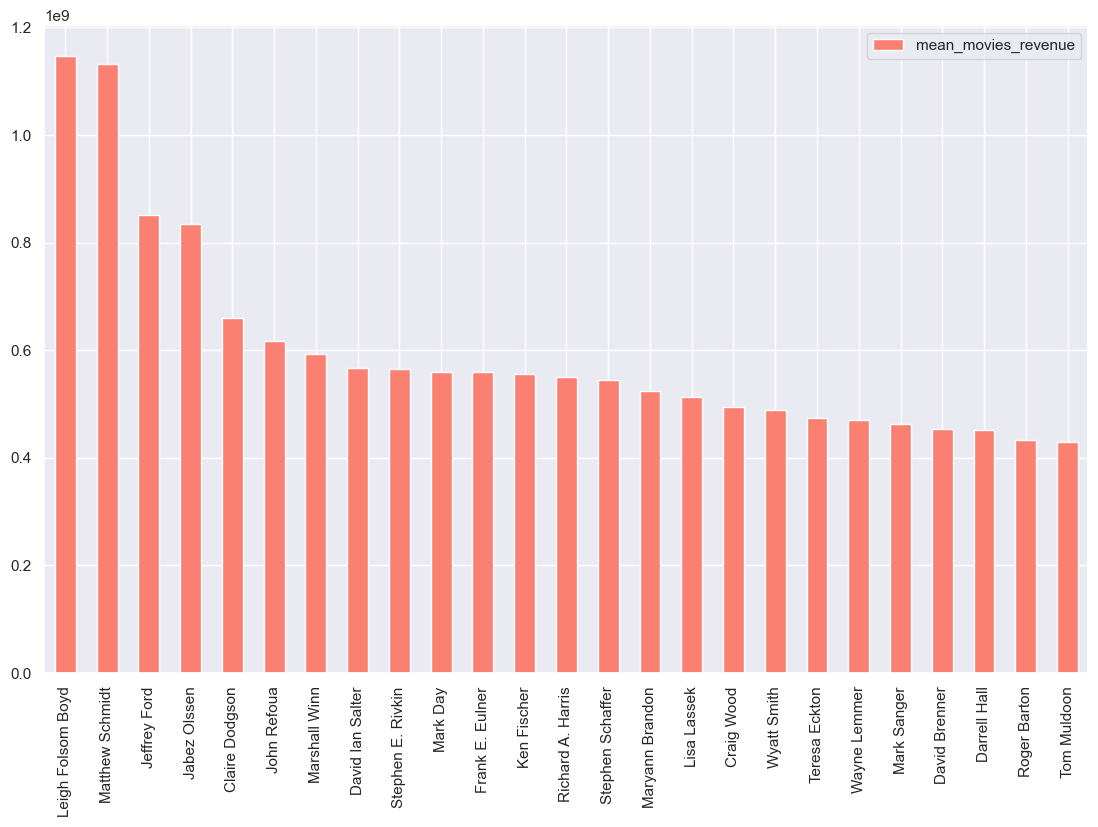

In [7815]:
editorsDict = {}
for element in train[["revenue", "editors"]].values:

    for editor in element[1]:
        if editor not in editorsDict:
            editorsDict[editor] = [element[0], 1]
        else:
            editorsDict[editor][0] += element[0]
            editorsDict[editor][1] += 1

editorsDict = {k: v for k, v in editorsDict.items() if v[1] >= 5}

for editor in editorsDict:
    editorsDict[editor][0] = editorsDict[editor][0]/editorsDict[editor][1]
    editorsDict[editor] = editorsDict[editor][0]




editors_train = pd.DataFrame.from_dict(editorsDict, orient='index', columns=["mean_movies_revenue"])
editors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

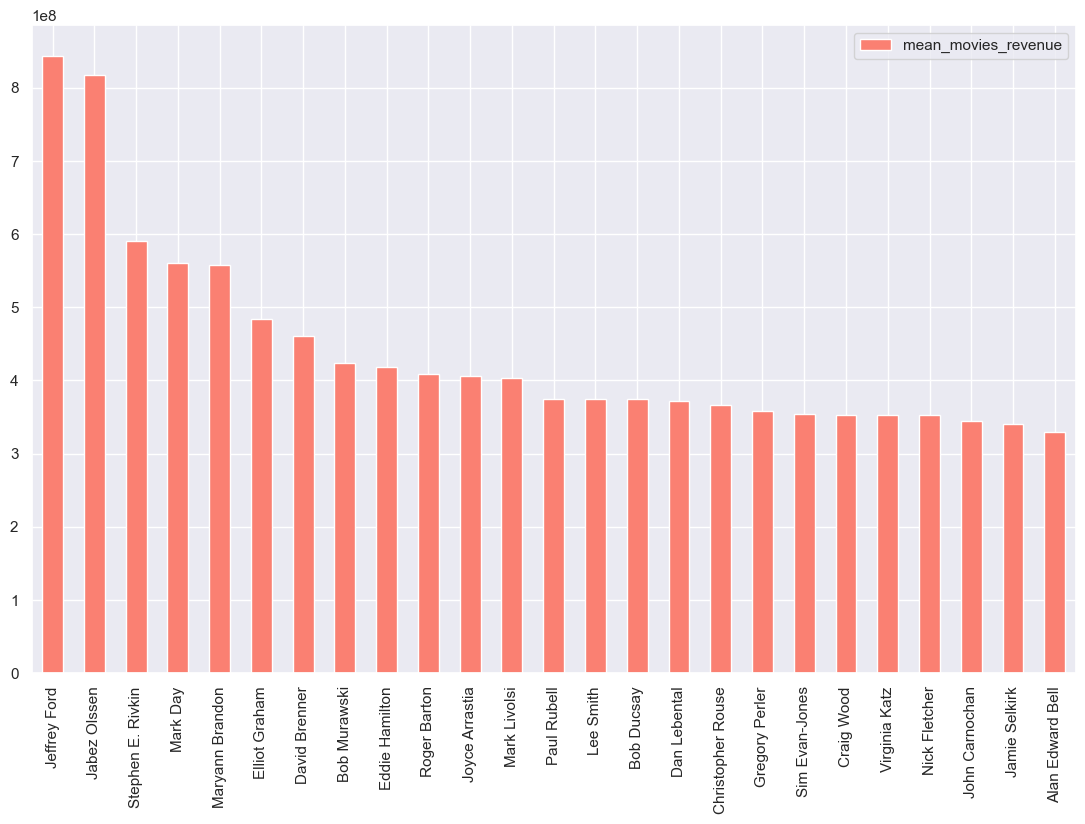

In [7816]:
leadEditorDict = {}
for element in train[["revenue", "editors"]].values:
   # compare results when looking at x top editors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadEditorDict:
            leadEditorDict[element[1][i]] = [element[0], 1]
        else:
            leadEditorDict[element[1][i]][0] += element[0]
            leadEditorDict[element[1][i]][1] += 1    

leadEditorDict = {k: v for k, v in leadEditorDict.items() if v[1] >= 5}

for editor in leadEditorDict:
    leadEditorDict[editor][0] = leadEditorDict[editor][0]/leadEditorDict[editor][1]
    leadEditorDict[editor] = leadEditorDict[editor][0]


    
    
editors_train = pd.DataFrame.from_dict(leadEditorDict, orient='index', columns=["mean_movies_revenue"])
editors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [7817]:
# Sort both of our dicts
leadEditorDict = {k: v for k, v in sorted(leadEditorDict.items(), key=lambda item: item[1], reverse = True)}
editorsDict = {k: v for k, v in sorted(editorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top Editor'
def checkLeadEditor(crew):
    if len(crew) < 1 or crew[0] not in list(leadEditorDict)[:25]:
        return 0
    else:
        return 1

def checkTopEditors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for editor in crew[:5]:
        if editor in list(editorsDict)[:100]:
            count += 1
    return count

def getEditorsRank(crew):
    if len(crew) < 1:
        return len(editorsDict)
    rank = 0
    for c in crew[:5]:
        if c in list(editorsDict):
            rank += list(editorsDict.keys()).index(c)
    if rank == 0:
        rank = len(editorsDict)
    return rank / len(crew)


#Creating a feature for top LEAD Editors
train['topLeadEditor'] = train['editors'].apply(lambda x: checkLeadEditor(x))
test['topLeadEditor'] = test['editors'].apply(lambda x: checkLeadEditor(x))

#Creating feature for number of top Editors
train['numTopEditors'] = train['editors'].apply(lambda x: checkTopEditors(x))
test['numTopEditors'] = test['editors'].apply(lambda x: checkTopEditors(x))

train['editorsRank'] = train['editors'].apply(lambda x: getEditorsRank(x))
test['editorsRank'] = test['editors'].apply(lambda x: getEditorsRank(x))


print(train['topLeadEditor'].value_counts())
print()
print(train['numTopEditors'].value_counts())
print()
print(train['editorsRank'].value_counts())

topLeadEditor
0    7054
1     235
Name: count, dtype: int64

numTopEditors
0    6617
1     548
2     101
3      19
4       4
Name: count, dtype: int64

editorsRank
681.000000    2767
340.500000     325
227.000000      74
170.250000      28
101.000000      28
              ... 
563.666667       1
21.300000        1
257.714286       1
73.600000        1
30.333333        1
Name: count, Length: 1445, dtype: int64


In [7818]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['topLeadEditor'], train['revenue'])
print('Pearsons correlation between topLeadEditor and revenue: %.3f' % corr)
corr, _ = pearsonr(train['topLeadEditor'], np.log1p((train['revenue'])))
print('Pearsons correlation between topLeadEditor and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['numTopEditors'], train['revenue'])
print('Pearsons correlation between numTopEditors and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopEditors']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed numTopEditors and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['editorsRank'], train['revenue'])
print('Pearsons correlation between editorsRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['editorsRank']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed editorsRank and log transformed revenue: %.3f' % corr)


Pearsons correlation between topLeadEditor and revenue: 0.373
Pearsons correlation between topLeadEditor and log transformed revenue: 0.172

Pearsons correlation between numTopEditors and revenue: 0.490
Pearsons correlation between log transformed numTopEditors and log transformed revenue: 0.273

Pearsons correlation between editorsRank and revenue: -0.387
Pearsons correlation between log transformed editorsRank and log transformed revenue: -0.389


In [7819]:
# add feature
train_features.append('topLeadEditor')
log_features.append('numTopEditors')
log_features.append('editorsRank')

**Revenue and Budget Cleaning**

In [7820]:
# create new dataframe
df = pd.DataFrame()
df['production_companies'] = train['production_companies']
df['production_companies_reform'] = train['production_companies_reform']
df['num_studios'] = train.production_companies_reform.apply(lambda x: len(x))
df['revenue'] = train['revenue']
# bivariate analysis of revenue with production studios
# production companies copy
companiesDict2 = {}
for element in df["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict2:
            companiesDict2[company] = 1
        else:
            companiesDict2[company] += 1

companies_df = pd.DataFrame.from_dict(companiesDict2, orient='index', columns=["movies per company"])

companies_df.columns = ["number_of_studios"]

for g in companies_df.index.values:
    df[g] = df['production_companies_reform'].apply(lambda x: 1 if g in x else 0)
    
studioMidRev = {}
# calculate the average budget for each studio
for studio in companies_df.index.values:
    studioMidRev[studio] = df.loc[df[studio] == 1, 'revenue'].median()
studioMidRev

{'Paramount Pictures': 52034889.0,
 'United Artists': 25539076.5,
 'Metro-Goldwyn-Mayer (MGM)': 13220811.0,
 'Walt Disney Pictures': 153355533.0,
 'Bold Films': 13682516.5,
 'Blumhouse Productions': 81705746.0,
 'Right of Way Films': 15636462.0,
 'Ghost House Pictures': 61126535.5,
 'North Box Productions': 85446075.0,
 'Jim Henson Productions': 30804449.0,
 'Jim Henson Company, The': 34327391.0,
 'Castle Rock Entertainment': 48236823.0,
 'Twentieth Century Fox Film Corporation': 50589532.0,
 'Amercent Films': 22642033.0,
 'American Entertainment Partners L.P.': 18532286.0,
 'Interscope Communications': 25105517.0,
 'DreamWorks SKG': 147845033.0,
 'Jinks/Cohen Company': 120405627.5,
 'Double Feature Films': 39850959.0,
 'Jersey Films': 50964779.5,
 'Nina Saxon Film Design': 91885604.0,
 'Cruise/Wagner Productions': 206667689.0,
 'Amblin Entertainment': 180893042.0,
 'Blue Tulip Productions': 164508066.0,
 'Ronald Shusett/Gary Goldman': 358372926.0,
 'Digital Image Associates': 11800000

In [7821]:
def getAvgStudioRev(movie):
    if movie.budget < 10000: 
        if len(movie.production_companies_reform) > 0:
            studios = movie.production_companies_reform
            median_revs = []
            for studio in studios:
                if studio in companies_df.index:
                     median_revs.append(float(studioMidRev[studio]))
            if(len(median_revs) > 0) and np.mean(median_revs) > 10000:
                movie.budget_processed = np.mean(median_revs)
            else:
                movie.budget_processed = train.budget.median()
        else:
            movie.budget_processed = train.budget.median()
        
        
    
    if 'revenue' in movie and movie.revenue < 10000 and len(movie.production_companies_reform) > 0:
        studios = movie.production_companies_reform
        median_revs = []
        for studio in studios:
            if studio in companies_df.index:
                 median_revs.append(float(studioMidRev[studio]))
        if(len(median_revs) > 0) and np.mean(median_revs) > 10000:
            movie.revenue = np.mean(median_revs)
        else:
            movie.revenue = train.revenue.median()
        return movie
    else:
        return movie

In [7822]:
train = train.apply(getAvgStudioRev, axis=1)
test = test.apply(getAvgStudioRev, axis=1)

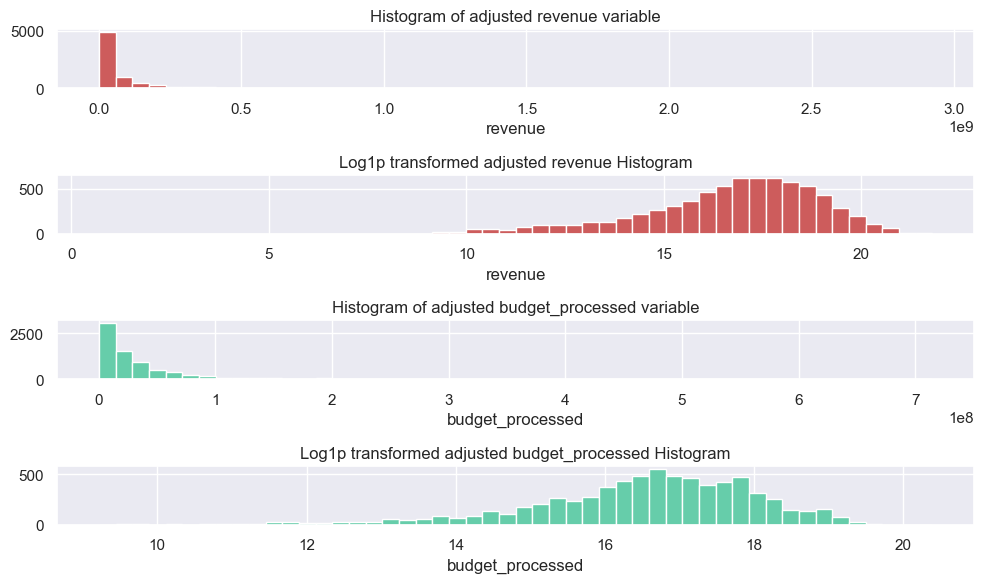

In [7823]:
f, ax = plt.subplots(4, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(a=train.revenue, kde = False, ax = ax[0], color='indianred', hist_kws=dict(alpha=1))
ax[0].set_title("Histogram of adjusted revenue variable")
sns.distplot(a=np.log1p(train.revenue), kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Log1p transformed adjusted revenue Histogram")
sns.distplot(a=train.budget_processed, kde = False, ax = ax[2], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[2].set_title("Histogram of adjusted budget_processed variable")
sns.distplot(a=np.log1p(train.budget_processed), kde = False, ax = ax[3], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[3].set_title("Log1p transformed adjusted budget_processed Histogram")
f.tight_layout()

**Inflation of Budget/Revenue**

In [7824]:
train['budget_to_year_ratio'] = train['budget_processed'] / (train['year'] * train['year'])
test['budget_to_year_ratio'] = test['budget_processed'] / (test['year'] * test['year'])

In [7825]:
train['runtime_to_year_ratio'] = train['runtime'] / (train['year'])
test['runtime_to_year_ratio'] = test['runtime'] / (test['year'])

In [7826]:
# correlation analysis and create log feature
corr, _ = pearsonr(train['budget_to_year_ratio'], train['revenue'])
print('Pearsons correlation between budget_to_year_ratio and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['budget_to_year_ratio']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed budget_to_year_ratio and log transformed revenue: %.3f' % corr)
print()
corr, _ = pearsonr(train['runtime_to_year_ratio'], train['revenue'])
print('Pearsons correlation between runtime_to_year_ratio and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['runtime_to_year_ratio']), np.log1p((train['revenue'])))
print('Pearsons correlation between log transformed runtime_to_year_ratio and log transformed revenue: %.3f' % corr)


Pearsons correlation between budget_to_year_ratio and revenue: 0.643
Pearsons correlation between log transformed budget_to_year_ratio and log transformed revenue: 0.605

Pearsons correlation between runtime_to_year_ratio and revenue: 0.227
Pearsons correlation between log transformed runtime_to_year_ratio and log transformed revenue: 0.232


In [7827]:
# add feature
log_features.append('budget_to_year_ratio')
log_features.append('runtime_to_year_ratio')


**Feature Selection**

In [7828]:
print(cols_to_drop)


['imdb_id', 'original_title', 'overview', 'poster_path', 'status', 'title']


In [7829]:
print(train_features)

['belongs_to_collection', 'has_homepage', 'originally_english', 'numTopStudios', 'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease', 'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease', 'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'spoken_english', 'has_tagline', 'topLeadActor', 'topLeadDirector', 'topLeadExecProd', 'topLeadProducer', 'topLeadComposer', 'topLeadDirectorPhoto', 'topLeadEditor']


In [7830]:
print(log_features)

['revenue', 'budget_processed', 'genre_rank', 'num_genres', 'popularity', 'topStudio', 'num_studios', 'studioRank', 'num_production_countries', 'topCountry', 'countryRank', 'runtime_processed', 'num_languages', 'num_keywords', 'numTopKeywords', 'keywordRank', 'cast_num', 'numTopActors', 'actorRanks', 'topActorRank', 'crew_num', 'numTopDirectors', 'directorsRank', 'numTopExecProd', 'execProdRank', 'numTopProducers', 'producersRank', 'numTopComposers', 'composersRank', 'numTopDirectorsPhoto', 'directorsPhotoRank', 'numTopEditors', 'editorsRank', 'budget_to_year_ratio', 'runtime_to_year_ratio']


In [7831]:
# We will log transform all of these features and add them to our set of features for our model.
for feat in log_features:
    train["log_" + feat] = np.log1p(train[feat])
    if feat is not "revenue":
        test["log_" + feat] = np.log1p(test[feat]) 
        train_features.append("log_" + feat)

In [7832]:
print(train_features)
print()
print("Number of features: ", len(train_features))

['belongs_to_collection', 'has_homepage', 'originally_english', 'numTopStudios', 'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease', 'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease', 'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'spoken_english', 'has_tagline', 'topLeadActor', 'topLeadDirector', 'topLeadExecProd', 'topLeadProducer', 'topLeadComposer', 'topLeadDirectorPhoto', 'topLeadEditor', 'log_budget_processed', 'log_genre_rank', 'log_num_genres', 'log_popularity', 'log_topStudio', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_topCountry', 'log_countryRank', 'log_runtime_processed', 'log_num_languages', 'log_num_keywords', 'log_numTopKeywords', 'log_keywordRank', 'log_cast_num', 'log_numTopActors', 'log_actorRanks', 'log_topActorRank', 'log_crew_num', 'log_numTopDirectors', 'log_directorsRank', 'log_numTopExecProd', 'log_execProdRank', 'log_numTopProducers', 'log_produc

**Modeling**

In [7833]:
#Set up our X and y
X = train[train_features]
y = train['log_revenue']

In [7834]:
# create a 80/20 stratified split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [7835]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_root_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [7836]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%'.format(accuracy))
    
    return accuracy

In [7837]:
def metrics(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    errors = abs(y_pred - y_test)
    mae = np.mean(errors)
    mape = 100 * (errors / y_test)
    # calculate Root-Mean-Squared-Logarithmic-Error (RMSLE)
    
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))

    
    # Calculate and display accuracy
    test_accuracy = 100 - np.mean(mape)
    print('Test Set Accuracy (from Mean Absolute Percentage Error):{:.3f}%'.format(test_accuracy))

**Random Forest**

In [7838]:
rfr_base_model = RandomForestRegressor(random_state=42)
rfr_base_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [7839]:
y_pred = rfr_base_model.predict(X_test)

In [7840]:
errors = abs(np.expm1(y_pred) - np.expm1(y_test.values))
# Print out the mean absolute error (mae)
print('Average Error:', round(np.mean(errors), 2))

Average Error: 46649782.32


In [7841]:
print('Random Forest Baseline Model Metrics:')
metrics(y_pred, y_test.values)

Random Forest Baseline Model Metrics:
Mean Squared Error:  2.4023
Root Mean Squared Error:  1.5499
Mean Absolute Error:  1.0795
Test Set Accuracy (from Mean Absolute Percentage Error):91.175%


In [7842]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [10, 25, 30],
#     'max_features': [.4, 'auto'],
#     'min_samples_leaf': [1, 2, 5],
#     'min_samples_split': [1, 3, 5],
#     'n_estimators': [100,400]
# }

# # Create a based model
# rfr = RandomForestRegressor(random_state=42)
# # Instantiate the grid search model
# rfr, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, rfr, 
#                                  param_grid, cv=5)

# # Root Mean Squared Error
# print(np.sqrt(-rfr.best_score_))
# print(rfr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=

In [7843]:
# print('Base Model:')
# base_accuracy = evaluate(rfr_base_model, X_test, y_test.values)
# print()
# print('Model after Tuning:')
# rfr_best_model = rfr.best_estimator_
# best_accuracy = evaluate(rfr_best_model, X_test, y_test.values)

# print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base Model:
Average Error: 1.0795
Accuracy = 91.175%

Model after Tuning:
Average Error: 1.0695
Accuracy = 91.130%
Improvement of -0.05%.


In [7844]:
# y_pred = rfr_best_model.predict(X_test)
# print('Random Forest Model (After Tuning) Metrics:')
# metrics(y_pred, y_test.values)

Random Forest Model (After Tuning) Metrics:
Mean Squared Error:  2.3596
Root Mean Squared Error:  1.5361
Mean Absolute Error:  1.0695
Test Set Accuracy (from Mean Absolute Percentage Error):91.130%


**XGBoost**

In [7845]:
xgb_base_model = xgb.XGBRegressor(random_state = 42)
xgb_base_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [7846]:
y_pred = xgb_base_model.predict(X_test)


In [7847]:
print('XGBoost Baseline Model Metrics:')
metrics(y_pred, y_test.values)

XGBoost Baseline Model Metrics:
Mean Squared Error:  2.5446
Root Mean Squared Error:  1.5952
Mean Absolute Error:  1.111
Test Set Accuracy (from Mean Absolute Percentage Error):91.026%


In [7848]:
# xgb_model = xgb.XGBRegressor(random_state=42)
# param_grid = {
#     'n_estimators': [100, 200],
#     'colsample_bytree': [0.9, 1.0, 1.1],
#     'max_depth': [2, 5, 10],
#     'reg_alpha': [1.0, 1.2, 1.3],
#     'reg_lambda': [ 1.2, 1.3, 1.4],
#     'subsample': [0.9, 1.0]
# }

# xgb_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, xgb_model, 
#                                  param_grid, cv=5)

# # Root Mean Squared Error
# print(np.sqrt(-xgb_model.best_score_))
# print(xgb_model.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.2, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, max_depth=2, n_estimators=100, reg_alpha=1.0, reg_lambda=1.3, subsample=0.9; tot

In [7849]:
# print('Base Model:')
# base_accuracy = evaluate(xgb_base_model, X_test, y_test.values)
# print()
# print('Model after Tuning:')
# xgb_best_model = xgb_model.best_estimator_
# best_accuracy = evaluate(xgb_best_model, X_test, y_test.values)


# print('Improvement of {:0.3f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base Model:
Average Error: 1.1110
Accuracy = 91.026%

Model after Tuning:
Average Error: 1.0649
Accuracy = 91.113%
Improvement of 0.095%.


**LightGBM**

In [7850]:
lgbm_base_model = LGBMRegressor(random_state=42)
lgbm_base_model.fit(X_train, y_train.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4268
[LightGBM] [Info] Number of data points in the train set: 5831, number of used features: 65
[LightGBM] [Info] Start training from score 16.665360


LGBMRegressor(random_state=42)

In [7851]:
y_pred = lgbm_base_model.predict(X_test)

In [7852]:
print('LightGBM Baseline Model Metrics:')
metrics(y_pred, y_test.values)

LightGBM Baseline Model Metrics:
Mean Squared Error:  2.3674
Root Mean Squared Error:  1.5386
Mean Absolute Error:  1.0621
Test Set Accuracy (from Mean Absolute Percentage Error):91.201%


In [7856]:
test_pred = np.expm1(lgbm_base_model.predict(test[train_features]))

In [7857]:
# add id column back to test_pred
test_pred = pd.DataFrame(test_pred)
test_pred['id'] = test['id']
test_pred.columns = ['revenue', 'id']
test_pred = test_pred[['id', 'revenue']]
test_pred.head()


,id,revenue
0,3001,3.570556e+05
1,3002,3.897269e+05
2,3003,3.363592e+07
3,3004,7.818338e+06
4,3005,1.136291e+06


In [7858]:
# output predictions to csv
test_pred.to_csv('submission.csv', index=False)